## 什么是PyTorch

PyTorch是一个基于Python的科学计算库，它有以下特点:

- 类似于NumPy，但是它可以使用GPU
- 可以用它定义深度学习模型，可以灵活地进行深度学习模型的训练和使用

### Tensors

Tensor类似与NumPy的ndarray，唯一的区别是Tensor可以在GPU上加速运算。

In [3]:
import torch

构造一个未初始化的5x3矩阵:

In [18]:
x = torch.empty(5,3)
x

tensor([[2.8251e+05, 7.8893e-43, 2.8251e+05],
        [7.8893e-43, 2.8251e+05, 7.8893e-43],
        [2.8251e+05, 7.8893e-43, 2.8251e+05],
        [7.8893e-43, 2.8251e+05, 7.8893e-43],
        [2.8251e+05, 7.8893e-43, 2.8251e+05]])

构建一个随机初始化的矩阵: torch.rand是均匀分布，torch.randn是标准正态分布

In [19]:
x = torch.rand(5,3)
x

tensor([[0.7054, 0.0115, 0.9597],
        [0.9421, 0.4642, 0.4273],
        [0.5290, 0.8471, 0.4369],
        [0.3095, 0.1544, 0.9498],
        [0.0889, 0.9291, 0.5059]])

构建一个全部为0，类型为long的矩阵:

In [20]:
x = torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [21]:
x = torch.zeros(5,3).long()  # 强制类型转换
x.dtype

torch.int64

从数据直接直接构建tensor:

In [22]:
x = torch.tensor([5.5,3]) # 1*2的矩阵
x

tensor([5.5000, 3.0000])

也可以从一个已有的tensor构建一个tensor。这些方法会重用原来tensor的特征，例如，数据类型，除非提供新的数据。

In [23]:
x = x.new_ones(5,3, dtype=torch.double) # 
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [24]:
x = torch.randn_like(x, dtype=torch.float) # 随机产生跟x形状相同的tensor
x

tensor([[ 0.5924,  0.9863,  1.0319],
        [ 0.4186, -0.8391, -0.0890],
        [-1.7492, -0.2189,  0.3351],
        [ 1.1020, -1.2133,  1.4746],
        [-0.1461,  1.0083,  0.8271]])

得到tensor的形状:

In [25]:
x.shape

torch.Size([5, 3])

<div class="alert alert-info"><h4>注意</h4><p>``torch.Size`` 返回的是一个tuple</p></div>

Operations


有很多种tensor运算。我们先介绍加法运算。

In [26]:
y = torch.rand(5,3)
y

tensor([[0.9765, 0.4238, 0.2948],
        [0.7273, 0.9435, 0.3466],
        [0.6223, 0.9892, 0.7007],
        [0.1638, 0.5064, 0.0386],
        [0.5196, 0.8638, 0.3709]])

In [27]:
x + y # 两个tensor直接相加

tensor([[ 1.5689,  1.4100,  1.3267],
        [ 1.1459,  0.1044,  0.2576],
        [-1.1269,  0.7703,  1.0358],
        [ 1.2658, -0.7070,  1.5132],
        [ 0.3736,  1.8721,  1.1980]])

另一种着加法的写法

In [28]:
torch.add(x, y)  # tensor相加函数

tensor([[ 1.5689,  1.4100,  1.3267],
        [ 1.1459,  0.1044,  0.2576],
        [-1.1269,  0.7703,  1.0358],
        [ 1.2658, -0.7070,  1.5132],
        [ 0.3736,  1.8721,  1.1980]])

加法：把输出作为一个变量

In [29]:
result = torch.empty(5,3)
torch.add(x, y, out=result)
# result = x + y
result

tensor([[ 1.5689,  1.4100,  1.3267],
        [ 1.1459,  0.1044,  0.2576],
        [-1.1269,  0.7703,  1.0358],
        [ 1.2658, -0.7070,  1.5132],
        [ 0.3736,  1.8721,  1.1980]])

in-place加法

In [30]:
y.add_(x)  # 直接在y上做更改，也就是返回值放到y中
y

tensor([[ 1.5689,  1.4100,  1.3267],
        [ 1.1459,  0.1044,  0.2576],
        [-1.1269,  0.7703,  1.0358],
        [ 1.2658, -0.7070,  1.5132],
        [ 0.3736,  1.8721,  1.1980]])

<div class="alert alert-info"><h4>注意</h4><p>任何in-place的运算都会以``_``结尾。
    举例来说：``x.copy_(y)``, ``x.t_()``, 会改变 ``x``。</p></div>

各种类似NumPy的indexing都可以在PyTorch tensor上面使用。

In [31]:
x[1:, 1:] # 切片

tensor([[-0.8391, -0.0890],
        [-0.2189,  0.3351],
        [-1.2133,  1.4746],
        [ 1.0083,  0.8271]])

Resizing: 如果你希望resize/reshape一个tensor，可以使用``torch.view``：

In [32]:
x = torch.randn(4,4)
y = x.view(16)   # 将x转为16维的tensor
z = x.view(-1,8) # 任何维度写成-1就会自动识别具体数值
z

tensor([[-0.0205,  0.5863, -1.3809, -0.7456, -2.0674, -0.7317,  2.5107, -0.1470],
        [-0.8988, -1.4296,  1.7932,  0.3143, -0.4821,  0.1191,  1.0049,  0.2906]])

如果你有一个只有一个元素的tensor，使用``.item()``方法可以把里面的value变成Python数值。

In [33]:
x = torch.randn(1)
x

tensor([-1.2214])

In [34]:
x.item()  # tensor ==> python

-1.2214466333389282

In [35]:
z.transpose(1,0)  # 矩阵的维度互换

tensor([[-0.0205, -0.8988],
        [ 0.5863, -1.4296],
        [-1.3809,  1.7932],
        [-0.7456,  0.3143],
        [-2.0674, -0.4821],
        [-0.7317,  0.1191],
        [ 2.5107,  1.0049],
        [-0.1470,  0.2906]])

**更多阅读**


  各种Tensor operations, 包括transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers在
  `<https://pytorch.org/docs/torch>`.

### Numpy和Tensor之间的转化

在Torch Tensor和NumPy array之间相互转化非常容易。

**Torch Tensor和NumPy array会共享内存，所以改变其中一项也会改变另一项。**

把Torch Tensor转变成NumPy Array

In [2]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [3]:
b = a.numpy()    # tensor ===> numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

改变numpy array里面的值。

In [4]:
b[1] = 2
b

array([1., 2., 1., 1., 1.], dtype=float32)

In [5]:
a

tensor([1., 2., 1., 1., 1.])

把NumPy ndarray转成Torch Tensor

In [6]:
import numpy as np

In [7]:
a = np.ones(5)
b = torch.from_numpy(a)    # numpy ===> tensor
np.add(a, 1, out=a)        # numpy的相加函数
print(a)

[2. 2. 2. 2. 2.]


In [8]:
b

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

所有CPU上的Tensor都支持转成numpy或者从numpy转成Tensor。

### CUDA Tensors

使用``.to``方法，Tensor可以被移动到别的device上。

In [36]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)    # 把tensor搬到GPU
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))    # 把tensor从GPU搬回到CPU
    

tensor([-0.2214], device='cuda:0')
tensor([-0.2214], dtype=torch.float64)


In [37]:
# GPU上的tensor不可以转为numpy，所以必搬回到CPU才能转为numpy，因为numpy是在CPU的
y.to("cpu").data.numpy()
y.cpu().data.numpy()

array([1.], dtype=float32)

In [ ]:
# 把model搬到cuda
model = model.cuda()

### 用numpy实现两层神经网络

一个全连接ReLU神经网络，一个隐藏层，没有bias。用来从x预测y，使用L2 Loss。
- $h = W_1X$
- $a = max(0, h)$
- $y_{hat} = W_2a$

这一实现完全使用numpy来计算前向神经网络，loss，和反向传播。
- forward pass
- loss
- backward pass

numpy ndarray是一个普通的n维array。它不知道任何关于深度学习或者梯度(gradient)的知识，也不知道计算图(computation graph)，只是一种用来计算数学运算的数据结构。

In [10]:
# 64个训练数据, 输入是1000维, 隐藏层是100维, 输出是10维
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据,正态分布
x = np.random.randn(N, D_in)    # 64个训练数据,每个维度是1000
y = np.random.randn(N, D_out)   # 输出是10维

w1 = np.random.randn(D_in, H)   # 输入层 ==> 隐藏层
w2 = np.random.randn(H, D_out)  # 隐藏层 ==> 输出层

learning_rate = 1e-6            # 学习率
for it in range(500):
    # Forward pass
    h = x.dot(w1)               # N * H
    h_relu = np.maximum(h, 0)   # N * H
    y_pred = h_relu.dot(w2)     # N * D_out
    
    # compute loss
    loss = np.square(y_pred - y).sum()
    print(it, loss)
    
    # Backward pass
    # compute the gradient
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 31589010.97757206
1 32032361.415442623
2 36532286.92206487
3 38370295.270497814
4 32607056.55221738
5 20820217.776104927
6 10550873.812148217
7 4884393.869130288
8 2492604.7173278416
9 1525314.8289688863
10 1093955.1952010193
11 861240.2854857739
12 710396.2568568155
13 599738.5452808375
14 512760.62678585073
15 441878.9869910692
16 383086.90872362204
17 333786.5498639076
18 292110.2385405301
19 256550.88948888215
20 226137.89787798238
21 200003.8651590041
22 177469.78649526235
23 157927.17434944655
24 140922.51610387655
25 126068.12137287592
26 113057.2017217832
27 101609.05986083572
28 91507.39374227289
29 82560.44391924681
30 74621.71579432023
31 67571.28595227773
32 61289.69514277215
33 55677.382032707894
34 50651.41427469961
35 46147.40230452048
36 42097.54446727611
37 38451.06413643714
38 35160.844602185316
39 32188.421539585855
40 29500.32697434475
41 27058.404850120576
42 24841.87571415577
43 22832.064123187614
44 21007.401921595723
45 19347.685780595522
46 17834.335648431414

### PyTorch: Tensors

这次我们使用PyTorch tensors来创建前向神经网络，计算损失，以及反向传播。

一个PyTorch Tensor很像一个numpy的ndarray。但是它和numpy ndarray最大的区别是，PyTorch Tensor可以在CPU或者GPU上运算。如果想要在GPU上运算，就需要把Tensor换成cuda类型。

In [11]:
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    h = x.mm(w1)             # N * H, 矩阵乘法
    h_relu = h.clamp(min=0)  # N * H, 下限是0
    y_pred = h_relu.mm(w2)   # N * D_out
    
    # compute loss
    loss = (y_pred - y).pow(2).sum().item()   # tensor转为python表示
    print(it, loss)
    
    # Backward pass 
    # compute the gradient (手动)
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 34576312.0
1 32510804.0
2 34094456.0
3 33462306.0
4 27375170.0
5 17991892.0
6 9881738.0
7 5087395.5
8 2782959.5
9 1734153.25
10 1228542.625
11 950661.5
12 773756.625
13 647202.75
14 549723.5625
15 471403.875
16 406932.3125
17 353084.46875
18 307790.5
19 269375.8125
20 236593.90625
21 208498.21875
22 184310.5625
23 163393.125
24 145251.8125
25 129458.296875
26 115659.046875
27 103561.484375
28 92932.5625
29 83571.8203125
30 75300.2109375
31 67973.671875
32 61469.37109375
33 55681.40625
34 50518.44140625
35 45905.5390625
36 41776.42578125
37 38071.5234375
38 34743.53125
39 31748.9765625
40 29049.58984375
41 26611.625
42 24406.646484375
43 22409.712890625
44 20598.01171875
45 18953.95703125
46 17459.67578125
47 16098.291015625
48 14856.2099609375
49 13722.8232421875
50 12687.0947265625
51 11739.0966796875
52 10870.513671875
53 10073.9970703125
54 9342.740234375
55 8670.7529296875
56 8052.81787109375
57 7483.79443359375
58 6959.6083984375
59 6476.2353515625
60 6030.0576171875
61 5618.171

简单的autograd

In [12]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

y = w*x + b     # y = 2*1+3

y.backward()    # 

# dy / dw = x
print(w.grad)
print(x.grad)
print(b.grad)

tensor(1.)
tensor(2.)
tensor(1.)


### PyTorch: Tensor和autograd  

**PyTorch的一个重要功能就是autograd，也就是说只要定义了forward pass(前向神经网络)，计算了loss之后，PyTorch可以自动求导计算模型所有参数的梯度。**

一个PyTorch的Tensor表示计算图中的一个节点。如果``x``是一个Tensor并且``x.requires_grad=True``那么``x.grad``是另一个储存着``x``当前梯度(相对于一个scalar，常常是loss)的向量。


In [13]:
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)   # 模型参数W1需要gradient
w2 = torch.randn(H, D_out, requires_grad=True)  # 模型参数W2需要gradient

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # compute loss
    loss = (y_pred - y).pow(2).sum() # computation graph
    print(it, loss.item())
    
    # Backward pass
    loss.backward()                  # 自动求导
    
    # update weights of w1 and w2
    with torch.no_grad():              # 不会把W1和W2的gradients记住,节约内存
        w1 -= learning_rate * w1.grad  # 梯度下降
        w2 -= learning_rate * w2.grad  # 
        w1.grad.zero_()                # gradient必须清零, 否则gradient会不断累加
        w2.grad.zero_()                # 

0 30404994.0
1 25766830.0
2 24082324.0
3 21928268.0
4 18106224.0
5 13207399.0
6 8685804.0
7 5391984.5
8 3338013.0
9 2152406.5
10 1479057.375
11 1084818.25
12 840327.75
13 677745.875
14 562169.0
15 475117.5
16 406805.84375
17 351438.21875
18 305637.5
19 267208.90625
20 234634.734375
21 206842.109375
22 182954.859375
23 162364.578125
24 144476.53125
25 128903.2421875
26 115301.6015625
27 103363.3125
28 92890.09375
29 83643.1171875
30 75463.6015625
31 68207.453125
32 61756.71484375
33 56002.2265625
34 50856.8828125
35 46242.8828125
36 42112.625
37 38400.4921875
38 35057.40625
39 32040.736328125
40 29314.3828125
41 26848.125
42 24612.9609375
43 22583.958984375
44 20741.703125
45 19064.09765625
46 17535.896484375
47 16143.1767578125
48 14870.91796875
49 13708.2177734375
50 12645.310546875
51 11672.44921875
52 10780.8671875
53 9963.33203125
54 9212.75390625
55 8523.4814453125
56 7889.79736328125
57 7306.9697265625
58 6770.46923828125
59 6276.3115234375
60 5820.9130859375
61 5401.083984375
62

### PyTorch: nn  

这次我们使用PyTorch中nn这个库来构建网络。
用PyTorch autograd来构建计算图和计算gradients，
然后PyTorch会帮我们自动计算gradient。

In [14]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 定义一个model,包含一系列层(线性层==>非线性层==>线性层)
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=False),  # w_1 * x + b_1
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False),
)

# 初始化第一和第三层的权重为标准正态分布
torch.nn.init.normal_(model[0].weight)
torch.nn.init.normal_(model[2].weight)

# 在CUDA上操作
# model = model.cuda()

# 定义loss function
loss_fn = nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    y_pred = model(x) # model.forward() 
    
    # compute loss
    loss = loss_fn(y_pred, y) # computation graph
    print(it, loss.item())
    
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    with torch.no_grad():
        for param in model.parameters():          # param (tensor, grad)
            param -= learning_rate * param.grad   # 更新每个parameter的gradient
            
    model.zero_grad()    # 在下一次做backward之前, 要把model中所有的gradients清零

0 30584082.0
1 27407488.0
2 27411188.0
3 26371430.0
4 22369450.0
5 16013351.0
6 9947126.0
7 5671097.0
8 3233256.0
9 1955288.875
10 1294840.5
11 934720.375
12 721134.125
13 581780.5
14 482886.8125
15 407987.0625
16 348679.3125
17 300402.1875
18 260369.46875
19 226770.265625
20 198309.1875
21 174049.203125
22 153255.453125
23 135330.75
24 119811.8984375
25 106337.0859375
26 94587.265625
27 84326.15625
28 75330.28125
29 67426.015625
30 60455.8203125
31 54293.1328125
32 48837.6328125
33 43995.109375
34 39691.5859375
35 35856.9765625
36 32435.734375
37 29382.40234375
38 26646.267578125
39 24191.486328125
40 21987.462890625
41 20006.26171875
42 18222.091796875
43 16612.62890625
44 15159.1015625
45 13843.458984375
46 12652.052734375
47 11571.60546875
48 10592.5322265625
49 9703.494140625
50 8894.634765625
51 8158.60546875
52 7488.68115234375
53 6877.5263671875
54 6319.71240234375
55 5810.2685546875
56 5344.748046875
57 4919.052734375
58 4529.76416015625
59 4173.2646484375
60 3846.3330078125
6

In [15]:
# 拿到model中第一层的权重值
model[0].weight

Parameter containing:
tensor([[-0.4157,  0.5799,  0.8094,  ...,  0.7169, -0.1234,  0.0714],
        [ 0.3616,  0.3003, -0.7448,  ...,  1.7456,  0.4496,  1.4171],
        [ 0.5597,  0.5766, -0.1384,  ..., -0.7784,  0.2010, -0.4795],
        ...,
        [ 0.7863,  1.4226,  0.0921,  ..., -0.7318,  0.4703, -1.4407],
        [-1.2247,  0.7996,  0.3422,  ...,  1.0790, -0.7005, -1.3105],
        [ 0.6267, -0.2989, -1.8842,  ..., -0.2625,  0.9338, -1.2195]],
       requires_grad=True)

### PyTorch: optim

这一次我们不再手动更新模型的weights,而是使用optim这个包来帮助我们更新参数。
optim这个package提供了各种不同的模型优化方法，包括SGD+momentum, RMSProp, Adam等等。

In [16]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=False), # w_1 * x + b_1
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False),
)

torch.nn.init.normal_(model[0].weight)
torch.nn.init.normal_(model[2].weight)

# model = model.cuda()

loss_fn = nn.MSELoss(reduction='sum')
# learning_rate = 1e-4
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

learning_rate = 1e-6
# 定义优化器,参数必须是model的parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for it in range(500):
    # Forward pass
    y_pred = model(x) # model.forward() 
    
    # compute loss
    loss = loss_fn(y_pred, y) # computation graph
    print(it, loss.item())

    optimizer.zero_grad()     # 求导(backward)之前需要清零优化器
    
    # Backward pass
    loss.backward()
    
    # update model parameters
    optimizer.step()

0 25701622.0
1 19079542.0
2 16068579.0
3 14051148.0
4 12072919.0
5 9941292.0
6 7767226.0
7 5804557.5
8 4201435.0
9 2997906.0
10 2139265.0
11 1546468.125
12 1141855.875
13 865508.25
14 674153.5
15 538986.375
16 440507.375
17 366907.28125
18 310321.09375
19 265740.375
20 229801.53125
21 200220.109375
22 175543.28125
23 154712.125
24 136921.203125
25 121619.90625
26 108366.5625
27 96822.8984375
28 86730.4609375
29 77876.015625
30 70082.109375
31 63193.2265625
32 57075.359375
33 51639.19921875
34 46800.8203125
35 42481.48046875
36 38616.953125
37 35158.9609375
38 32057.267578125
39 29273.125
40 26763.650390625
41 24498.216796875
42 22449.0390625
43 20593.20703125
44 18911.91796875
45 17385.615234375
46 15998.322265625
47 14736.3427734375
48 13585.8681640625
49 12536.798828125
50 11579.095703125
51 10702.66796875
52 9900.484375
53 9166.28125
54 8492.826171875
55 7874.24658203125
56 7305.67138671875
57 6782.3173828125
58 6300.42822265625
59 5856.1904296875
60 5446.380859375
61 5068.076171875

### PyTorch: 自定义 nn Modules  

我们可以定义一个模型，这个模型继承自nn.Module类。如果需要定义一个比Sequential模型更加复杂的模型，就需要定义nn.Module模型。

In [17]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 自定义两层model
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        # define the model architecture
        self.linear1 = torch.nn.Linear(D_in, H, bias=False)
        self.linear2 = torch.nn.Linear(H, D_out, bias=False)
    
    def forward(self, x):
        y_pred = self.linear2(self.linear1(x).clamp(min=0))  # 计算预测值
        return y_pred

# 初始化model
model = TwoLayerNet(D_in, H, D_out)

# 定义loss function
loss_fn = nn.MSELoss(reduction='sum')

# 定义优化器
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 开始训练
for it in range(500):
    # Forward pass
    y_pred = model(x)          # model.forward() 
    
    # compute loss
    loss = loss_fn(y_pred, y)  # computation graph
    print(it, loss.item())

    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # update model parameters
    optimizer.step()

0 612.8851928710938
1 596.4942626953125
2 580.6094360351562
3 565.1251220703125
4 550.0615234375
5 535.4725341796875
6 521.3463745117188
7 507.6250915527344
8 494.3796081542969
9 481.5726318359375
10 469.1031188964844
11 457.09967041015625
12 445.44354248046875
13 434.09368896484375
14 423.11212158203125
15 412.403076171875
16 401.92144775390625
17 391.70135498046875
18 381.7684326171875
19 372.1032409667969
20 362.67822265625
21 353.500244140625
22 344.55584716796875
23 335.8111572265625
24 327.3143310546875
25 319.0458984375
26 311.01580810546875
27 303.20648193359375
28 295.5889587402344
29 288.1719665527344
30 280.933349609375
31 273.88067626953125
32 267.0078125
33 260.31976318359375
34 253.7830047607422
35 247.40472412109375
36 241.19911193847656
37 235.16195678710938
38 229.24734497070312
39 223.470703125
40 217.82260131835938
41 212.28904724121094
42 206.87698364257812
43 201.5718536376953
44 196.37486267089844
45 191.2836151123047
46 186.3026580810547
47 181.42311096191406
48 

## FizzBuzz

FizzBuzz是一个简单的小游戏。游戏规则如下：从1开始往上数数，当遇到3的倍数的时候，说fizz，当遇到5的倍数，说buzz，当遇到15的倍数，就说fizzbuzz，其他情况下则正常数数。

我们可以写一个简单的小程序来决定要返回正常数值还是fizz, buzz 或者 fizzbuzz。

In [38]:
# One-hot encode the desired outputs: [number, "fizz", "buzz", "fizzbuzz"]
def fizz_buzz_encode(i):
    if   i % 15 == 0: return 3
    elif i % 5  == 0: return 2
    elif i % 3  == 0: return 1
    else:             return 0
    
def fizz_buzz_decode(i, prediction):
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]

print(fizz_buzz_decode(1, fizz_buzz_encode(1)))
print(fizz_buzz_decode(2, fizz_buzz_encode(2)))
print(fizz_buzz_decode(5, fizz_buzz_encode(5)))
print(fizz_buzz_decode(12, fizz_buzz_encode(12)))
print(fizz_buzz_decode(15, fizz_buzz_encode(15)))

1
2
buzz
fizz
fizzbuzz


我们首先定义模型的输入与输出(训练数据)

In [46]:
import numpy as np
import torch

NUM_DIGITS = 10

# Represent each input by an array of its binary digits.
def binary_encode(i, num_digits):
    return np.array([i >> d & 1 for d in range(num_digits)])  # 用num_digits长度的二进制表示一个十进制数字

# 定义训练数据: 输入是923*10, 输出是923*1
trX = torch.Tensor([binary_encode(i, NUM_DIGITS) for i in range(101, 2 ** NUM_DIGITS)])
trY = torch.LongTensor([fizz_buzz_encode(i) for i in range(101, 2 ** NUM_DIGITS)])
print(trX.shape, trY.shape)

torch.Size([923, 10]) torch.Size([923])


然后我们用PyTorch定义模型

In [47]:
# Define the model.
NUM_HIDDEN = 100
model = torch.nn.Sequential(
    torch.nn.Linear(NUM_DIGITS, NUM_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(NUM_HIDDEN, 4)    # 四分类问题
)
# if torch.cuda.is_available():
#     model = model.cuda()

- 为了让我们的模型学会FizzBuzz这个游戏，我们需要定义一个损失函数，和一个优化算法。
- 这个优化算法会不断优化（降低）损失函数，使得模型的在该任务上取得尽可能低的损失值。
- 损失值低往往表示我们的模型表现好，损失值高表示我们的模型表现差。
- 由于FizzBuzz游戏本质上是一个分类问题，我们选用Cross Entropyy Loss函数。
- 优化函数我们选用Stochastic Gradient Descent。

In [48]:
# 定义分类问题的损失函数和优化器
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

以下是模型的训练代码

In [49]:
# Start training it
BATCH_SIZE = 128
for epoch in range(10000):                          # 训练10000次
    for start in range(0, len(trX), BATCH_SIZE):    # 每次训练中再分批处理
        end = start + BATCH_SIZE
        batchX = trX[start:end]
        batchY = trY[start:end]
        
        # 训练数据放到CUDA
#         if torch.cuda.is_available():
#             batchX = batchX.cuda()
#             batchY = batchY.cuda()
        
        # forward pass
        y_pred = model(batchX)
        loss = loss_fn(y_pred, batchY)

        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # gradient descent
        optimizer.step()

    # Find loss on training data
    loss = loss_fn(model(trX), trY).item()
    print('Epoch:', epoch, 'Loss:', loss)

Epoch: 0 Loss: 1.1671295166015625
Epoch: 1 Loss: 1.1505825519561768
Epoch: 2 Loss: 1.1473468542099
Epoch: 3 Loss: 1.1460673809051514
Epoch: 4 Loss: 1.1453193426132202
Epoch: 5 Loss: 1.1447807550430298
Epoch: 6 Loss: 1.1443426609039307
Epoch: 7 Loss: 1.1439651250839233
Epoch: 8 Loss: 1.143627405166626
Epoch: 9 Loss: 1.1433199644088745
Epoch: 10 Loss: 1.1430312395095825
Epoch: 11 Loss: 1.1427569389343262
Epoch: 12 Loss: 1.1424994468688965
Epoch: 13 Loss: 1.14225435256958
Epoch: 14 Loss: 1.1420193910598755
Epoch: 15 Loss: 1.1417971849441528
Epoch: 16 Loss: 1.1415824890136719
Epoch: 17 Loss: 1.1413750648498535
Epoch: 18 Loss: 1.1411782503128052
Epoch: 19 Loss: 1.140988826751709
Epoch: 20 Loss: 1.1408054828643799
Epoch: 21 Loss: 1.1406307220458984
Epoch: 22 Loss: 1.14046049118042
Epoch: 23 Loss: 1.140296220779419
Epoch: 24 Loss: 1.1401362419128418
Epoch: 25 Loss: 1.1399821043014526
Epoch: 26 Loss: 1.1398342847824097
Epoch: 27 Loss: 1.1396851539611816
Epoch: 28 Loss: 1.1395463943481445
Epoch

Epoch: 461 Loss: 1.0576612949371338
Epoch: 462 Loss: 1.05746591091156
Epoch: 463 Loss: 1.0572350025177002
Epoch: 464 Loss: 1.0565558671951294
Epoch: 465 Loss: 1.056056261062622
Epoch: 466 Loss: 1.055806040763855
Epoch: 467 Loss: 1.0552853345870972
Epoch: 468 Loss: 1.0549802780151367
Epoch: 469 Loss: 1.0545657873153687
Epoch: 470 Loss: 1.0539137125015259
Epoch: 471 Loss: 1.0535575151443481
Epoch: 472 Loss: 1.053863286972046
Epoch: 473 Loss: 1.0530118942260742
Epoch: 474 Loss: 1.0524027347564697
Epoch: 475 Loss: 1.05244779586792
Epoch: 476 Loss: 1.0515512228012085
Epoch: 477 Loss: 1.0511388778686523
Epoch: 478 Loss: 1.0507194995880127
Epoch: 479 Loss: 1.050369381904602
Epoch: 480 Loss: 1.0503205060958862
Epoch: 481 Loss: 1.0492684841156006
Epoch: 482 Loss: 1.0495191812515259
Epoch: 483 Loss: 1.0488884449005127
Epoch: 484 Loss: 1.0481494665145874
Epoch: 485 Loss: 1.048030138015747
Epoch: 486 Loss: 1.0474677085876465
Epoch: 487 Loss: 1.047338604927063
Epoch: 488 Loss: 1.0470020771026611
Ep

Epoch: 917 Loss: 0.7658336758613586
Epoch: 918 Loss: 0.7644246816635132
Epoch: 919 Loss: 0.7642066478729248
Epoch: 920 Loss: 0.7636033296585083
Epoch: 921 Loss: 0.7617868185043335
Epoch: 922 Loss: 0.7605236172676086
Epoch: 923 Loss: 0.7596681118011475
Epoch: 924 Loss: 0.7591968178749084
Epoch: 925 Loss: 0.7579259276390076
Epoch: 926 Loss: 0.7570577263832092
Epoch: 927 Loss: 0.755851686000824
Epoch: 928 Loss: 0.7550821900367737
Epoch: 929 Loss: 0.7555748820304871
Epoch: 930 Loss: 0.7537617683410645
Epoch: 931 Loss: 0.7533740997314453
Epoch: 932 Loss: 0.7519095540046692
Epoch: 933 Loss: 0.7503618597984314
Epoch: 934 Loss: 0.7508559226989746
Epoch: 935 Loss: 0.7491081357002258
Epoch: 936 Loss: 0.7479967474937439
Epoch: 937 Loss: 0.7467458844184875
Epoch: 938 Loss: 0.7469519376754761
Epoch: 939 Loss: 0.7451224327087402
Epoch: 940 Loss: 0.7452773451805115
Epoch: 941 Loss: 0.7438775897026062
Epoch: 942 Loss: 0.7440063953399658
Epoch: 943 Loss: 0.7416478991508484
Epoch: 944 Loss: 0.7409866452

Epoch: 1361 Loss: 0.3813348710536957
Epoch: 1362 Loss: 0.3804241716861725
Epoch: 1363 Loss: 0.38091710209846497
Epoch: 1364 Loss: 0.3790685534477234
Epoch: 1365 Loss: 0.37828388810157776
Epoch: 1366 Loss: 0.37794965505599976
Epoch: 1367 Loss: 0.37711581587791443
Epoch: 1368 Loss: 0.376871794462204
Epoch: 1369 Loss: 0.3755810260772705
Epoch: 1370 Loss: 0.3763425052165985
Epoch: 1371 Loss: 0.375156044960022
Epoch: 1372 Loss: 0.374043345451355
Epoch: 1373 Loss: 0.37314683198928833
Epoch: 1374 Loss: 0.3726581931114197
Epoch: 1375 Loss: 0.37171319127082825
Epoch: 1376 Loss: 0.3712460994720459
Epoch: 1377 Loss: 0.37088415026664734
Epoch: 1378 Loss: 0.3695302903652191
Epoch: 1379 Loss: 0.3689679801464081
Epoch: 1380 Loss: 0.368332177400589
Epoch: 1381 Loss: 0.367782324552536
Epoch: 1382 Loss: 0.3667169511318207
Epoch: 1383 Loss: 0.3672838509082794
Epoch: 1384 Loss: 0.36589735746383667
Epoch: 1385 Loss: 0.3650367558002472
Epoch: 1386 Loss: 0.3644337058067322
Epoch: 1387 Loss: 0.363414824008941

Epoch: 1797 Loss: 0.1782175749540329
Epoch: 1798 Loss: 0.17774489521980286
Epoch: 1799 Loss: 0.17766305804252625
Epoch: 1800 Loss: 0.1773190200328827
Epoch: 1801 Loss: 0.17686007916927338
Epoch: 1802 Loss: 0.17690642178058624
Epoch: 1803 Loss: 0.17646771669387817
Epoch: 1804 Loss: 0.17642800509929657
Epoch: 1805 Loss: 0.17585347592830658
Epoch: 1806 Loss: 0.17583943903446198
Epoch: 1807 Loss: 0.17536661028862
Epoch: 1808 Loss: 0.17530374228954315
Epoch: 1809 Loss: 0.17478276789188385
Epoch: 1810 Loss: 0.17495375871658325
Epoch: 1811 Loss: 0.17449894547462463
Epoch: 1812 Loss: 0.1740904003381729
Epoch: 1813 Loss: 0.17379769682884216
Epoch: 1814 Loss: 0.17366880178451538
Epoch: 1815 Loss: 0.17384852468967438
Epoch: 1816 Loss: 0.17306627333164215
Epoch: 1817 Loss: 0.17292238771915436
Epoch: 1818 Loss: 0.17275463044643402
Epoch: 1819 Loss: 0.17227086424827576
Epoch: 1820 Loss: 0.17200851440429688
Epoch: 1821 Loss: 0.17191989719867706
Epoch: 1822 Loss: 0.17207300662994385
Epoch: 1823 Loss: 

Epoch: 2229 Loss: 0.10650036484003067
Epoch: 2230 Loss: 0.1063622385263443
Epoch: 2231 Loss: 0.1062159538269043
Epoch: 2232 Loss: 0.10617890954017639
Epoch: 2233 Loss: 0.10606302320957184
Epoch: 2234 Loss: 0.10593526065349579
Epoch: 2235 Loss: 0.1058071106672287
Epoch: 2236 Loss: 0.10571444779634476
Epoch: 2237 Loss: 0.10560999810695648
Epoch: 2238 Loss: 0.10556701570749283
Epoch: 2239 Loss: 0.10543933510780334
Epoch: 2240 Loss: 0.10537666827440262
Epoch: 2241 Loss: 0.10525594651699066
Epoch: 2242 Loss: 0.10512358695268631
Epoch: 2243 Loss: 0.105152927339077
Epoch: 2244 Loss: 0.10492606461048126
Epoch: 2245 Loss: 0.10481537133455276
Epoch: 2246 Loss: 0.10470451414585114
Epoch: 2247 Loss: 0.1045757308602333
Epoch: 2248 Loss: 0.10452643781900406
Epoch: 2249 Loss: 0.10438501089811325
Epoch: 2250 Loss: 0.10435175895690918
Epoch: 2251 Loss: 0.10421611368656158
Epoch: 2252 Loss: 0.10409204661846161
Epoch: 2253 Loss: 0.1039891466498375
Epoch: 2254 Loss: 0.10393382608890533
Epoch: 2255 Loss: 0

Epoch: 2661 Loss: 0.0740671157836914
Epoch: 2662 Loss: 0.07396484911441803
Epoch: 2663 Loss: 0.07387436926364899
Epoch: 2664 Loss: 0.07390188425779343
Epoch: 2665 Loss: 0.07376675307750702
Epoch: 2666 Loss: 0.0737120658159256
Epoch: 2667 Loss: 0.07372020184993744
Epoch: 2668 Loss: 0.07360817492008209
Epoch: 2669 Loss: 0.07362392544746399
Epoch: 2670 Loss: 0.07347884774208069
Epoch: 2671 Loss: 0.07349720597267151
Epoch: 2672 Loss: 0.07339026778936386
Epoch: 2673 Loss: 0.07331346720457077
Epoch: 2674 Loss: 0.07327642291784286
Epoch: 2675 Loss: 0.07323070615530014
Epoch: 2676 Loss: 0.07315930724143982
Epoch: 2677 Loss: 0.0731341689825058
Epoch: 2678 Loss: 0.07303822785615921
Epoch: 2679 Loss: 0.07300972938537598
Epoch: 2680 Loss: 0.07297687977552414
Epoch: 2681 Loss: 0.0728595182299614
Epoch: 2682 Loss: 0.07283385097980499
Epoch: 2683 Loss: 0.0727756917476654
Epoch: 2684 Loss: 0.07270215451717377
Epoch: 2685 Loss: 0.0727299153804779
Epoch: 2686 Loss: 0.0726659819483757
Epoch: 2687 Loss: 0

Epoch: 3091 Loss: 0.05529477074742317
Epoch: 3092 Loss: 0.05525246635079384
Epoch: 3093 Loss: 0.05526745691895485
Epoch: 3094 Loss: 0.05518920347094536
Epoch: 3095 Loss: 0.055153556168079376
Epoch: 3096 Loss: 0.05513948202133179
Epoch: 3097 Loss: 0.055093973875045776
Epoch: 3098 Loss: 0.055090487003326416
Epoch: 3099 Loss: 0.055023182183504105
Epoch: 3100 Loss: 0.05499022454023361
Epoch: 3101 Loss: 0.054966818541288376
Epoch: 3102 Loss: 0.05492798238992691
Epoch: 3103 Loss: 0.05487947165966034
Epoch: 3104 Loss: 0.054848767817020416
Epoch: 3105 Loss: 0.054788876324892044
Epoch: 3106 Loss: 0.05477519333362579
Epoch: 3107 Loss: 0.05473906919360161
Epoch: 3108 Loss: 0.05473509058356285
Epoch: 3109 Loss: 0.05466680973768234
Epoch: 3110 Loss: 0.05461501330137253
Epoch: 3111 Loss: 0.0546061210334301
Epoch: 3112 Loss: 0.05457378923892975
Epoch: 3113 Loss: 0.054580289870500565
Epoch: 3114 Loss: 0.054497528821229935
Epoch: 3115 Loss: 0.05446775257587433
Epoch: 3116 Loss: 0.05442870035767555
Epoc

Epoch: 3519 Loss: 0.04314957931637764
Epoch: 3520 Loss: 0.04313018172979355
Epoch: 3521 Loss: 0.043101776391267776
Epoch: 3522 Loss: 0.04309447482228279
Epoch: 3523 Loss: 0.04307859390974045
Epoch: 3524 Loss: 0.043071117252111435
Epoch: 3525 Loss: 0.04301359876990318
Epoch: 3526 Loss: 0.042984578758478165
Epoch: 3527 Loss: 0.04297308251261711
Epoch: 3528 Loss: 0.0429404079914093
Epoch: 3529 Loss: 0.04292804002761841
Epoch: 3530 Loss: 0.042902871966362
Epoch: 3531 Loss: 0.042886875569820404
Epoch: 3532 Loss: 0.042831871658563614
Epoch: 3533 Loss: 0.042847126722335815
Epoch: 3534 Loss: 0.04279229789972305
Epoch: 3535 Loss: 0.04278385266661644
Epoch: 3536 Loss: 0.04275187849998474
Epoch: 3537 Loss: 0.04277915880084038
Epoch: 3538 Loss: 0.04273777827620506
Epoch: 3539 Loss: 0.042712800204753876
Epoch: 3540 Loss: 0.04267468303442001
Epoch: 3541 Loss: 0.042635951191186905
Epoch: 3542 Loss: 0.042645134031772614
Epoch: 3543 Loss: 0.042598433792591095
Epoch: 3544 Loss: 0.042578183114528656
Epoc

Epoch: 3946 Loss: 0.03480196371674538
Epoch: 3947 Loss: 0.034811053425073624
Epoch: 3948 Loss: 0.03478027880191803
Epoch: 3949 Loss: 0.0347663052380085
Epoch: 3950 Loss: 0.034769583493471146
Epoch: 3951 Loss: 0.034731674939394
Epoch: 3952 Loss: 0.034740149974823
Epoch: 3953 Loss: 0.03470452129840851
Epoch: 3954 Loss: 0.034696463495492935
Epoch: 3955 Loss: 0.034682583063840866
Epoch: 3956 Loss: 0.034650176763534546
Epoch: 3957 Loss: 0.0346502885222435
Epoch: 3958 Loss: 0.03461654111742973
Epoch: 3959 Loss: 0.03460745885968208
Epoch: 3960 Loss: 0.03458546847105026
Epoch: 3961 Loss: 0.03457333520054817
Epoch: 3962 Loss: 0.03459347411990166
Epoch: 3963 Loss: 0.03455909341573715
Epoch: 3964 Loss: 0.03452179580926895
Epoch: 3965 Loss: 0.0345202274620533
Epoch: 3966 Loss: 0.03450445458292961
Epoch: 3967 Loss: 0.03448176383972168
Epoch: 3968 Loss: 0.034482911229133606
Epoch: 3969 Loss: 0.034443385899066925
Epoch: 3970 Loss: 0.03443125635385513
Epoch: 3971 Loss: 0.034398771822452545
Epoch: 3972

Epoch: 4372 Loss: 0.028874104842543602
Epoch: 4373 Loss: 0.02885342389345169
Epoch: 4374 Loss: 0.02886348031461239
Epoch: 4375 Loss: 0.028829989954829216
Epoch: 4376 Loss: 0.02885289303958416
Epoch: 4377 Loss: 0.028825094923377037
Epoch: 4378 Loss: 0.028806529939174652
Epoch: 4379 Loss: 0.028808800503611565
Epoch: 4380 Loss: 0.02877996116876602
Epoch: 4381 Loss: 0.02877817675471306
Epoch: 4382 Loss: 0.028748977929353714
Epoch: 4383 Loss: 0.02876213751733303
Epoch: 4384 Loss: 0.028731053695082664
Epoch: 4385 Loss: 0.02874632366001606
Epoch: 4386 Loss: 0.02870936132967472
Epoch: 4387 Loss: 0.028700949624180794
Epoch: 4388 Loss: 0.028684353455901146
Epoch: 4389 Loss: 0.028681935742497444
Epoch: 4390 Loss: 0.028658859431743622
Epoch: 4391 Loss: 0.028644489124417305
Epoch: 4392 Loss: 0.02863495424389839
Epoch: 4393 Loss: 0.028632666915655136
Epoch: 4394 Loss: 0.028606900945305824
Epoch: 4395 Loss: 0.02859797701239586
Epoch: 4396 Loss: 0.028579341247677803
Epoch: 4397 Loss: 0.028568591922521

Epoch: 4796 Loss: 0.024475684389472008
Epoch: 4797 Loss: 0.0244619008153677
Epoch: 4798 Loss: 0.024462934583425522
Epoch: 4799 Loss: 0.02443576604127884
Epoch: 4800 Loss: 0.024438951164484024
Epoch: 4801 Loss: 0.024418462067842484
Epoch: 4802 Loss: 0.02440616860985756
Epoch: 4803 Loss: 0.02440042607486248
Epoch: 4804 Loss: 0.02439405955374241
Epoch: 4805 Loss: 0.024389345198869705
Epoch: 4806 Loss: 0.02437085658311844
Epoch: 4807 Loss: 0.02437242679297924
Epoch: 4808 Loss: 0.0243550892919302
Epoch: 4809 Loss: 0.02434581331908703
Epoch: 4810 Loss: 0.024335499852895737
Epoch: 4811 Loss: 0.024330895394086838
Epoch: 4812 Loss: 0.024321621283888817
Epoch: 4813 Loss: 0.024315886199474335
Epoch: 4814 Loss: 0.02430216409265995
Epoch: 4815 Loss: 0.02429346740245819
Epoch: 4816 Loss: 0.02428961731493473
Epoch: 4817 Loss: 0.024273250252008438
Epoch: 4818 Loss: 0.024264460429549217
Epoch: 4819 Loss: 0.02426619827747345
Epoch: 4820 Loss: 0.02424491196870804
Epoch: 4821 Loss: 0.02424008399248123
Epo

Epoch: 5219 Loss: 0.02106330916285515
Epoch: 5220 Loss: 0.021058961749076843
Epoch: 5221 Loss: 0.021054577082395554
Epoch: 5222 Loss: 0.02103879675269127
Epoch: 5223 Loss: 0.0210349690169096
Epoch: 5224 Loss: 0.021032122895121574
Epoch: 5225 Loss: 0.02102215588092804
Epoch: 5226 Loss: 0.02101711370050907
Epoch: 5227 Loss: 0.021000072360038757
Epoch: 5228 Loss: 0.020994046702980995
Epoch: 5229 Loss: 0.02099994197487831
Epoch: 5230 Loss: 0.020983409136533737
Epoch: 5231 Loss: 0.020993608981370926
Epoch: 5232 Loss: 0.020975880324840546
Epoch: 5233 Loss: 0.020960833877325058
Epoch: 5234 Loss: 0.0209753829985857
Epoch: 5235 Loss: 0.020948203280568123
Epoch: 5236 Loss: 0.020940646529197693
Epoch: 5237 Loss: 0.020949769765138626
Epoch: 5238 Loss: 0.020928846672177315
Epoch: 5239 Loss: 0.020926978439092636
Epoch: 5240 Loss: 0.020917434245347977
Epoch: 5241 Loss: 0.020907577127218246
Epoch: 5242 Loss: 0.02090400457382202
Epoch: 5243 Loss: 0.020892206579446793
Epoch: 5244 Loss: 0.020883832126855

Epoch: 5643 Loss: 0.018366504460573196
Epoch: 5644 Loss: 0.01836196519434452
Epoch: 5645 Loss: 0.01836235821247101
Epoch: 5646 Loss: 0.018352510407567024
Epoch: 5647 Loss: 0.018343111500144005
Epoch: 5648 Loss: 0.018339697271585464
Epoch: 5649 Loss: 0.01833920180797577
Epoch: 5650 Loss: 0.01832304708659649
Epoch: 5651 Loss: 0.018324173986911774
Epoch: 5652 Loss: 0.018320312723517418
Epoch: 5653 Loss: 0.018309645354747772
Epoch: 5654 Loss: 0.01830052211880684
Epoch: 5655 Loss: 0.018294520676136017
Epoch: 5656 Loss: 0.01829470694065094
Epoch: 5657 Loss: 0.018296385183930397
Epoch: 5658 Loss: 0.01827872544527054
Epoch: 5659 Loss: 0.018281789496541023
Epoch: 5660 Loss: 0.018271364271640778
Epoch: 5661 Loss: 0.01827244833111763
Epoch: 5662 Loss: 0.018257858231663704
Epoch: 5663 Loss: 0.018254686146974564
Epoch: 5664 Loss: 0.01824389211833477
Epoch: 5665 Loss: 0.018249809741973877
Epoch: 5666 Loss: 0.018236706033349037
Epoch: 5667 Loss: 0.018231716006994247
Epoch: 5668 Loss: 0.01822692900896

Epoch: 6066 Loss: 0.016208970919251442
Epoch: 6067 Loss: 0.016211193054914474
Epoch: 6068 Loss: 0.01620197854936123
Epoch: 6069 Loss: 0.01620187610387802
Epoch: 6070 Loss: 0.016191786155104637
Epoch: 6071 Loss: 0.016184154897928238
Epoch: 6072 Loss: 0.016181642189621925
Epoch: 6073 Loss: 0.01618550345301628
Epoch: 6074 Loss: 0.016172295436263084
Epoch: 6075 Loss: 0.01617502048611641
Epoch: 6076 Loss: 0.0161634162068367
Epoch: 6077 Loss: 0.016164781525731087
Epoch: 6078 Loss: 0.01615702547132969
Epoch: 6079 Loss: 0.01615230180323124
Epoch: 6080 Loss: 0.016150273382663727
Epoch: 6081 Loss: 0.01614685356616974
Epoch: 6082 Loss: 0.016139307990670204
Epoch: 6083 Loss: 0.016134057193994522
Epoch: 6084 Loss: 0.016128214076161385
Epoch: 6085 Loss: 0.016126956790685654
Epoch: 6086 Loss: 0.016122017055749893
Epoch: 6087 Loss: 0.01611149124801159
Epoch: 6088 Loss: 0.016112226992845535
Epoch: 6089 Loss: 0.016112612560391426
Epoch: 6090 Loss: 0.016100358217954636
Epoch: 6091 Loss: 0.016102651134133

Epoch: 6488 Loss: 0.014441343024373055
Epoch: 6489 Loss: 0.014437396079301834
Epoch: 6490 Loss: 0.014440896920859814
Epoch: 6491 Loss: 0.014431515708565712
Epoch: 6492 Loss: 0.014426948502659798
Epoch: 6493 Loss: 0.014420179650187492
Epoch: 6494 Loss: 0.014427611604332924
Epoch: 6495 Loss: 0.014415138401091099
Epoch: 6496 Loss: 0.014410548843443394
Epoch: 6497 Loss: 0.014409594237804413
Epoch: 6498 Loss: 0.014405421912670135
Epoch: 6499 Loss: 0.014402884058654308
Epoch: 6500 Loss: 0.014394918456673622
Epoch: 6501 Loss: 0.014392444863915443
Epoch: 6502 Loss: 0.014389054849743843
Epoch: 6503 Loss: 0.01439059991389513
Epoch: 6504 Loss: 0.014384816400706768
Epoch: 6505 Loss: 0.014378857798874378
Epoch: 6506 Loss: 0.014374110847711563
Epoch: 6507 Loss: 0.014369262382388115
Epoch: 6508 Loss: 0.01436582487076521
Epoch: 6509 Loss: 0.014364433474838734
Epoch: 6510 Loss: 0.014360551722347736
Epoch: 6511 Loss: 0.014356265775859356
Epoch: 6512 Loss: 0.01435016468167305
Epoch: 6513 Loss: 0.01434578

Epoch: 6910 Loss: 0.012975716963410378
Epoch: 6911 Loss: 0.01297629065811634
Epoch: 6912 Loss: 0.012972857803106308
Epoch: 6913 Loss: 0.012969987466931343
Epoch: 6914 Loss: 0.012963468208909035
Epoch: 6915 Loss: 0.012964988127350807
Epoch: 6916 Loss: 0.012958734296262264
Epoch: 6917 Loss: 0.012955163605511189
Epoch: 6918 Loss: 0.012952114455401897
Epoch: 6919 Loss: 0.01295043807476759
Epoch: 6920 Loss: 0.012946098111569881
Epoch: 6921 Loss: 0.012940588407218456
Epoch: 6922 Loss: 0.012940720655024052
Epoch: 6923 Loss: 0.012936641462147236
Epoch: 6924 Loss: 0.01293251384049654
Epoch: 6925 Loss: 0.01293143816292286
Epoch: 6926 Loss: 0.012925473041832447
Epoch: 6927 Loss: 0.012924447655677795
Epoch: 6928 Loss: 0.012922566384077072
Epoch: 6929 Loss: 0.012920045293867588
Epoch: 6930 Loss: 0.012913551181554794
Epoch: 6931 Loss: 0.012911789119243622
Epoch: 6932 Loss: 0.01290962565690279
Epoch: 6933 Loss: 0.012906743213534355
Epoch: 6934 Loss: 0.012903264723718166
Epoch: 6935 Loss: 0.0128963869

Epoch: 7332 Loss: 0.011751516722142696
Epoch: 7333 Loss: 0.011749742552638054
Epoch: 7334 Loss: 0.01174484845250845
Epoch: 7335 Loss: 0.011746757663786411
Epoch: 7336 Loss: 0.011740592308342457
Epoch: 7337 Loss: 0.011739619076251984
Epoch: 7338 Loss: 0.011737870052456856
Epoch: 7339 Loss: 0.011731612496078014
Epoch: 7340 Loss: 0.011730342172086239
Epoch: 7341 Loss: 0.011728283949196339
Epoch: 7342 Loss: 0.011724792420864105
Epoch: 7343 Loss: 0.01172205526381731
Epoch: 7344 Loss: 0.01172073557972908
Epoch: 7345 Loss: 0.01171799749135971
Epoch: 7346 Loss: 0.01171465776860714
Epoch: 7347 Loss: 0.011712812818586826
Epoch: 7348 Loss: 0.011710315942764282
Epoch: 7349 Loss: 0.011705719865858555
Epoch: 7350 Loss: 0.011704226024448872
Epoch: 7351 Loss: 0.011701486073434353
Epoch: 7352 Loss: 0.011697920970618725
Epoch: 7353 Loss: 0.011694717220962048
Epoch: 7354 Loss: 0.011693190783262253
Epoch: 7355 Loss: 0.011689376085996628
Epoch: 7356 Loss: 0.011692219413816929
Epoch: 7357 Loss: 0.0116850044

Epoch: 7752 Loss: 0.01071358472108841
Epoch: 7753 Loss: 0.010709492489695549
Epoch: 7754 Loss: 0.010707016102969646
Epoch: 7755 Loss: 0.0107034957036376
Epoch: 7756 Loss: 0.010702506639063358
Epoch: 7757 Loss: 0.01070021279156208
Epoch: 7758 Loss: 0.010701454244554043
Epoch: 7759 Loss: 0.0106947747990489
Epoch: 7760 Loss: 0.010692443698644638
Epoch: 7761 Loss: 0.010692368261516094
Epoch: 7762 Loss: 0.010689185000956059
Epoch: 7763 Loss: 0.010687173344194889
Epoch: 7764 Loss: 0.010682260617613792
Epoch: 7765 Loss: 0.010682106018066406
Epoch: 7766 Loss: 0.010679584927856922
Epoch: 7767 Loss: 0.01067686453461647
Epoch: 7768 Loss: 0.010676591657102108
Epoch: 7769 Loss: 0.01067190058529377
Epoch: 7770 Loss: 0.010670258663594723
Epoch: 7771 Loss: 0.01067042350769043
Epoch: 7772 Loss: 0.010665043257176876
Epoch: 7773 Loss: 0.010662705637514591
Epoch: 7774 Loss: 0.010659780353307724
Epoch: 7775 Loss: 0.010659157298505306
Epoch: 7776 Loss: 0.010658832266926765
Epoch: 7777 Loss: 0.01065355818718

Epoch: 8174 Loss: 0.009814353659749031
Epoch: 8175 Loss: 0.009812308475375175
Epoch: 8176 Loss: 0.009809087961912155
Epoch: 8177 Loss: 0.00980925653129816
Epoch: 8178 Loss: 0.009805773384869099
Epoch: 8179 Loss: 0.009803352877497673
Epoch: 8180 Loss: 0.009803073480725288
Epoch: 8181 Loss: 0.009801332838833332
Epoch: 8182 Loss: 0.009798821993172169
Epoch: 8183 Loss: 0.009796719066798687
Epoch: 8184 Loss: 0.009794076904654503
Epoch: 8185 Loss: 0.00979231670498848
Epoch: 8186 Loss: 0.009790013544261456
Epoch: 8187 Loss: 0.009789232164621353
Epoch: 8188 Loss: 0.009785255417227745
Epoch: 8189 Loss: 0.009786093607544899
Epoch: 8190 Loss: 0.009782669134438038
Epoch: 8191 Loss: 0.0097826411947608
Epoch: 8192 Loss: 0.009777930565178394
Epoch: 8193 Loss: 0.009777247905731201
Epoch: 8194 Loss: 0.009776277467608452
Epoch: 8195 Loss: 0.009772338904440403
Epoch: 8196 Loss: 0.009769017808139324
Epoch: 8197 Loss: 0.009767847135663033
Epoch: 8198 Loss: 0.00976862758398056
Epoch: 8199 Loss: 0.0097646294

Epoch: 8596 Loss: 0.009039564989507198
Epoch: 8597 Loss: 0.009037237614393234
Epoch: 8598 Loss: 0.009034101851284504
Epoch: 8599 Loss: 0.00903293676674366
Epoch: 8600 Loss: 0.0090297507122159
Epoch: 8601 Loss: 0.009030956774950027
Epoch: 8602 Loss: 0.009028551168739796
Epoch: 8603 Loss: 0.009027065709233284
Epoch: 8604 Loss: 0.009025794453918934
Epoch: 8605 Loss: 0.009021949954330921
Epoch: 8606 Loss: 0.009020415134727955
Epoch: 8607 Loss: 0.00901717133820057
Epoch: 8608 Loss: 0.009017235599458218
Epoch: 8609 Loss: 0.009016643278300762
Epoch: 8610 Loss: 0.00901438295841217
Epoch: 8611 Loss: 0.009013702161610126
Epoch: 8612 Loss: 0.009010478854179382
Epoch: 8613 Loss: 0.009007961489260197
Epoch: 8614 Loss: 0.00900834146887064
Epoch: 8615 Loss: 0.009006131440401077
Epoch: 8616 Loss: 0.009004208259284496
Epoch: 8617 Loss: 0.009003369137644768
Epoch: 8618 Loss: 0.009001177735626698
Epoch: 8619 Loss: 0.008998207747936249
Epoch: 8620 Loss: 0.008996511809527874
Epoch: 8621 Loss: 0.00899466220

Epoch: 9018 Loss: 0.008366095833480358
Epoch: 9019 Loss: 0.008365835063159466
Epoch: 9020 Loss: 0.008362245745956898
Epoch: 9021 Loss: 0.008363158442080021
Epoch: 9022 Loss: 0.008361408486962318
Epoch: 9023 Loss: 0.008359527215361595
Epoch: 9024 Loss: 0.008358237333595753
Epoch: 9025 Loss: 0.008355372585356236
Epoch: 9026 Loss: 0.00835416465997696
Epoch: 9027 Loss: 0.008353564888238907
Epoch: 9028 Loss: 0.008353703655302525
Epoch: 9029 Loss: 0.008350304327905178
Epoch: 9030 Loss: 0.008349190466105938
Epoch: 9031 Loss: 0.008347251452505589
Epoch: 9032 Loss: 0.008344486355781555
Epoch: 9033 Loss: 0.008344761095941067
Epoch: 9034 Loss: 0.008342038840055466
Epoch: 9035 Loss: 0.0083413515239954
Epoch: 9036 Loss: 0.008341345004737377
Epoch: 9037 Loss: 0.008338822983205318
Epoch: 9038 Loss: 0.008337332867085934
Epoch: 9039 Loss: 0.008334635756909847
Epoch: 9040 Loss: 0.008334430865943432
Epoch: 9041 Loss: 0.008331706747412682
Epoch: 9042 Loss: 0.008330631069839
Epoch: 9043 Loss: 0.00832854770

Epoch: 9440 Loss: 0.0077818105928599834
Epoch: 9441 Loss: 0.00778015935793519
Epoch: 9442 Loss: 0.007779161911457777
Epoch: 9443 Loss: 0.007778869941830635
Epoch: 9444 Loss: 0.0077768657356500626
Epoch: 9445 Loss: 0.00777604803442955
Epoch: 9446 Loss: 0.00777348130941391
Epoch: 9447 Loss: 0.007772673387080431
Epoch: 9448 Loss: 0.007770674768835306
Epoch: 9449 Loss: 0.007770088966935873
Epoch: 9450 Loss: 0.007769712246954441
Epoch: 9451 Loss: 0.007767428178340197
Epoch: 9452 Loss: 0.007767190225422382
Epoch: 9453 Loss: 0.007764569018036127
Epoch: 9454 Loss: 0.007764304522424936
Epoch: 9455 Loss: 0.00776159530505538
Epoch: 9456 Loss: 0.00776186166331172
Epoch: 9457 Loss: 0.007759660482406616
Epoch: 9458 Loss: 0.007759453728795052
Epoch: 9459 Loss: 0.0077573680318892
Epoch: 9460 Loss: 0.007756866980344057
Epoch: 9461 Loss: 0.0077538564801216125
Epoch: 9462 Loss: 0.007754669990390539
Epoch: 9463 Loss: 0.0077517107129096985
Epoch: 9464 Loss: 0.007750430144369602
Epoch: 9465 Loss: 0.00774921

Epoch: 9858 Loss: 0.007271279580891132
Epoch: 9859 Loss: 0.007270950824022293
Epoch: 9860 Loss: 0.007270221132785082
Epoch: 9861 Loss: 0.0072693112306296825
Epoch: 9862 Loss: 0.007266562897711992
Epoch: 9863 Loss: 0.00726598035544157
Epoch: 9864 Loss: 0.0072646550834178925
Epoch: 9865 Loss: 0.0072630527429282665
Epoch: 9866 Loss: 0.007262321189045906
Epoch: 9867 Loss: 0.00726131210103631
Epoch: 9868 Loss: 0.007261947728693485
Epoch: 9869 Loss: 0.007259030360728502
Epoch: 9870 Loss: 0.0072572557255625725
Epoch: 9871 Loss: 0.007256685756146908
Epoch: 9872 Loss: 0.007256521377712488
Epoch: 9873 Loss: 0.007253957912325859
Epoch: 9874 Loss: 0.0072546727024018764
Epoch: 9875 Loss: 0.007252660114318132
Epoch: 9876 Loss: 0.007251051254570484
Epoch: 9877 Loss: 0.007249149028211832
Epoch: 9878 Loss: 0.0072498260997235775
Epoch: 9879 Loss: 0.007247134577482939
Epoch: 9880 Loss: 0.007246037945151329
Epoch: 9881 Loss: 0.007246627006679773
Epoch: 9882 Loss: 0.007244156673550606
Epoch: 9883 Loss: 0.0

最后我们用训练好的模型尝试在1到100这些数字上玩FizzBuzz游戏

In [50]:
# Output now
testX = torch.Tensor([binary_encode(i, NUM_DIGITS) for i in range(1, 101)])
with torch.no_grad():
    testY = model(testX)
predictions = zip(range(1, 101), list(testY.max(1)[1].data.tolist()))

print([fizz_buzz_decode(i, x) for (i, x) in predictions])

['fizzbuzz', '2', 'fizz', 'buzz', 'buzz', 'fizz', '7', '8', '9', 'buzz', '11', '12', '13', '14', 'fizzbuzz', '16', '17', 'fizz', '19', 'buzz', 'fizz', '22', '23', '24', 'buzz', '26', 'fizz', '28', '29', 'fizzbuzz', '31', '32', 'fizz', 'buzz', 'buzz', 'fizz', '37', '38', 'fizz', 'buzz', '41', 'fizz', '43', '44', 'fizzbuzz', '46', '47', 'fizz', '49', 'buzz', 'fizz', '52', '53', 'fizz', 'buzz', '56', 'fizz', '58', '59', 'fizzbuzz', '61', '62', 'fizz', 'buzz', 'buzz', 'fizz', '67', '68', 'fizz', 'buzz', '71', 'fizz', '73', '74', 'fizzbuzz', '76', '77', 'fizz', '79', 'buzz', '81', '82', '83', 'fizz', 'buzz', '86', '87', '88', '89', 'fizzbuzz', '91', '92', 'fizz', '94', 'buzz', 'fizz', '97', '98', 'fizz', 'buzz']


In [51]:
print(np.sum(testY.max(1)[1].numpy() == np.array([fizz_buzz_encode(i) for i in range(1,101)])))
testY.max(1)[1].numpy() == np.array([fizz_buzz_encode(i) for i in range(1,101)])

91


array([False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## CNN做图像分类

参考资料
- [Stanford CS231n](http://cs231n.github.io/convolutional-networks/)
- [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- [VGG](https://arxiv.org/pdf/1409.1556.pdf)
- [ResNet](https://arxiv.org/pdf/1512.03385.pdf)
- [DenseNet](https://arxiv.org/pdf/1608.06993.pdf)

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# torchvision是独立于pytorch的关于图像操作的一些方便工具库。
# torchvision的详细介绍在：https://pypi.org/project/torchvision/0.1.8/
# torchvision主要包括一下几个包：
# vision.datasets : 几个常用视觉数据集，可以下载和加载
# vision.models : 流行的模型，例如 AlexNet, VGG, and ResNet 以及 与训练好的参数。
# vision.transforms : 常用的图像操作，例如：随机切割，旋转等。
# vision.utils : 用于把形似 (3 x H x W) 的张量保存到硬盘中，给一个mini-batch的图像可以产生一个图像格网。

print("PyTorch Version: ",torch.__version__)

PyTorch Version:  1.4.0


### 加载数据

In [54]:
torch.manual_seed(53113)  #cpu随机种子

#没gpu下面可以忽略
use_cuda = torch.cuda.is_available()  
device = torch.device("cuda" if use_cuda else "cpu")  
batch_size = test_batch_size = 32  
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}


#torch.utils.data.DataLoader在训练模型时使用到此函数，用来把训练数据分成多个batch，
#此函数每次抛出一个batch数据，直至把所有的数据都抛出，也就是个数据迭代器。
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./mnist_data', 
                   train=True, #如果true，从training.pt创建数据集
                   download=True, #如果ture，从网上自动下载
                   
#transform 接受一个图像返回变换后的图像的函数，相当于图像先预处理下
#常用的操作如 ToTensor, RandomCrop，Normalize等. 
#他们可以通过transforms.Compose被组合在一起 
                   transform=transforms.Compose([
                       
                       transforms.ToTensor(), 
#.ToTensor()将shape为(H, W, C)的nump.ndarray或img转为shape为(C, H, W)的tensor，
#其将每一个数值归一化到[0,1]，其归一化方法比较简单，直接除以255即可。
                       
                       transforms.Normalize((0.1307,), (0.3081,)) # 所有图片像素均值和方差
#.Normalize作用就是.ToTensor将输入归一化到(0,1)后，再使用公式”(x-mean)/std”，将每个元素分布到(-1,1)  
                   ])), # 第一个参数dataset：数据集
    batch_size=batch_size, 
    shuffle=True,  #随机打乱数据
    **kwargs)##kwargs是上面gpu的设置
  

# 测试数据集
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./mnist_data', 
                   train=False, #如果False，从test.pt创建数据集
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, 
    shuffle=True, 
    **kwargs)

Extracting ./mnist_data\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist_data\MNIST\raw


Extracting ./mnist_data\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist_data\MNIST\raw


Extracting ./mnist_data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist_data\MNIST\raw


Extracting ./mnist_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist_data\MNIST\raw
Processing...
Done!


### 定义CNN模型

首先我们定义一个基于ConvNet的简单神经网络

In [53]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)  # 28*28的图像, kernel大小是5,步长是1,那么移动了28+1-5次, 产生24*24的特征
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1)
        #in_channels：输入图像通道数，手写数字图像为1，彩色图像为3
        #out_channels：输出通道数，这个等于卷积核的数量
        #kernel_size：卷积核大小
        #stride：步长
         
        self.conv2 = nn.Conv2d(20, 50, 5, 1) # 24*24的特征, kernel大小是5,步长是1,那么移动了24+1-5次, 产生20*20的特征
        #上个卷积网络的out_channels，就是下一个网络的in_channels，所以这里是20
        #out_channels：卷积核数量50
        
        
        self.fc1 = nn.Linear(4*4*50, 500)    # inf_features*out_features就是全连接层做矩阵乘法的右边矩阵
        #全连接层torch.nn.Linear(in_features, out_features)
        #in_features:输入特征维度，4*4*50是自己算出来的，跟输入图像维度有关
        #out_features；输出特征维度
        
        self.fc2 = nn.Linear(500, 10)
        #输出维度10，10分类

    def forward(self, x):  
        #print(x.shape)  #手写数字的输入维度，(N,1,28,28), N为batch_size, 1为单通道灰度图像, 分辨率是28*28
        x = F.relu(self.conv1(x)) # x = (N,20,24,24), 5*5的卷积核, 产生特征图是24*24
        x = F.max_pool2d(x, 2, 2) # x = (N,20,12,12), 2*2的maxpool, 产生downsampling特征图是12*12
        x = F.relu(self.conv2(x)) # x = (N,50,8,8), 5*5的卷积核, 产生特征图是(12+1-5)*(12+1-5)=8*8
        x = F.max_pool2d(x, 2, 2) # x = (N,50,4,4), 2*2的maxpool, 产生downsampling特征图是4*4
        x = x.view(-1, 4*4*50)    # x = (N,4*4*50), 将N*50*4*4的四维矩阵转为N*(4*4*50)的二维矩阵
        x = F.relu(self.fc1(x))   # x = (N,4*4*50)*(4*4*50, 500)=(N,500), 全连接层, 就是矩阵乘法
        x = self.fc2(x)           # x = (N,500)*(500, 10)=(N,10)
        return F.log_softmax(x, dim=1)  # 带log的softmax分类，每张图片返回10个概率

### 初始化模型和定义优化函数

In [55]:
lr = 0.01
momentum = 0.5

#模型初始化, 将model放到device上
model = Net().to(device) 

#定义优化器
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum) 

NLL loss的定义

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = - w_{y_n} x_{n,y_n}, \quad
        w_{c} = \text{weight}[c] \cdot \mathbb{1}\{c \not= \text{ignore\_index}\}$

### 定义训练和测试模型

In [56]:
def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    model.train() # 进入训练模式
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # data和target放到GPU上
        optimizer.zero_grad() # 梯度归零
        output = model(data)  # 输出的维度[N,10] 这里的data是函数的forward参数x
        loss = F.nll_loss(output, target) #这里loss求的是平均数，除以了batch
#F.nll_loss(F.log_softmax(input), target) ：
#单分类交叉熵损失函数，一张图片里只能有一个类别，输入input的需要softmax
#还有一种是多分类损失函数，一张图片有多个类别，输入的input需要sigmoid
        
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:0f}%)]\tLoss: {:.6f}".format(
                epoch, 
                batch_idx * len(data), #100*32
                len(train_loader.dataset), #60000
                100. * batch_idx / len(train_loader), #len(train_loader)=60000/32=1875
                loss.item()
            ))
            #print(len(train_loader))


In [57]:
def test(model, device, test_loader):
    model.eval() #进入测试模式
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data) 
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            #reduction='sum'代表batch的每个元素loss累加求和，默认是mean求平均
                       
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            
            #print(target.shape) #torch.Size([32])
            #print(pred.shape) #torch.Size([32, 1])
            correct += pred.eq(target.view_as(pred)).sum().item()
            #pred和target的维度不一样
            #pred.eq()相等返回1，不相等返回0，返回的tensor维度(32，1)。

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

### 查看运行结果

In [58]:
epochs = 2
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

save_model = True
if (save_model):
    torch.save(model.state_dict(),"mnist_cnn.pt")   #词典格式，model.state_dict()只保存模型参数
    

Train Epoch: 1 [0/60000 (0.000000%)]	Loss: 2.297938
Train Epoch: 1 [3200/60000 (5.333333%)]	Loss: 0.569983
Train Epoch: 1 [6400/60000 (10.666667%)]	Loss: 0.206423
Train Epoch: 1 [9600/60000 (16.000000%)]	Loss: 0.095930
Train Epoch: 1 [12800/60000 (21.333333%)]	Loss: 0.179087
Train Epoch: 1 [16000/60000 (26.666667%)]	Loss: 0.040764
Train Epoch: 1 [19200/60000 (32.000000%)]	Loss: 0.136779
Train Epoch: 1 [22400/60000 (37.333333%)]	Loss: 0.050968
Train Epoch: 1 [25600/60000 (42.666667%)]	Loss: 0.113659
Train Epoch: 1 [28800/60000 (48.000000%)]	Loss: 0.059484
Train Epoch: 1 [32000/60000 (53.333333%)]	Loss: 0.088600
Train Epoch: 1 [35200/60000 (58.666667%)]	Loss: 0.191012
Train Epoch: 1 [38400/60000 (64.000000%)]	Loss: 0.094172
Train Epoch: 1 [41600/60000 (69.333333%)]	Loss: 0.075000
Train Epoch: 1 [44800/60000 (74.666667%)]	Loss: 0.038324
Train Epoch: 1 [48000/60000 (80.000000%)]	Loss: 0.037892
Train Epoch: 1 [51200/60000 (85.333333%)]	Loss: 0.055766
Train Epoch: 1 [54400/60000 (90.666667%)

In [59]:
#同上
torch.manual_seed(53113)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = test_batch_size = 32
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./fashion_mnist_data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)) 
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./fashion_mnist_data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True, **kwargs)


lr = 0.01
momentum = 0.5
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

epochs = 2
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

save_model = True
if (save_model):
    torch.save(model.state_dict(),"fashion_mnist_cnn.pt")

Extracting ./fashion_mnist_data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./fashion_mnist_data\FashionMNIST\raw


Extracting ./fashion_mnist_data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./fashion_mnist_data\FashionMNIST\raw


Extracting ./fashion_mnist_data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./fashion_mnist_data\FashionMNIST\raw


Extracting ./fashion_mnist_data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./fashion_mnist_data\FashionMNIST\raw
Processing...
Done!

Train Epoch: 1 [0/60000 (0.000000%)]	Loss: 2.279603
Train Epoch: 1 [3200/60000 (5.333333%)]	Loss: 0.957838
Train Epoch: 1 [6400/60000 (10.666667%)]	Loss: 1.018690
Train Epoch: 1 [9600/60000 (16.000000%)]	Loss: 0.541348
Train Epoch: 1 [12800/60000 (21.333333%)]	Loss: 0.627392
Train Epoch: 1 [16000/60000 (26.666667%)]	Loss: 0.510979
Train Epoch: 1 [19200/60000 (32.000000%)]	Loss: 0.560108
Train Epoch: 1 [22400/60000 (37.333333%)]	Loss: 0.527978
Train Epoch: 1 [25600/60000 (42.666667%)]	Loss: 0.666773
Train Epoch: 1 [28800/60000 (48.000000%)]	Loss: 0.296420
Train Epoch: 1 [32000/60000 (53.333333%)]	Loss: 0.298870
Train Epoch: 1 [35200/60000 (58.666667%)]	Loss: 0.229143
Train Epoch: 1 [38400/60000 (64.000000%)]	Loss: 0.470563
Train Epoch: 1 [41600/60000 (69.333333%)]	Loss: 0.722310
Train Epoch: 1 [44800/60000 (74.666667%)]	Loss: 0.513217
Train Epoch: 1 [4

## CNN模型的Transfer Learning (迁移学习) 

- 很多时候当我们需要训练一个新的图像分类任务，我们不会完全从一个随机的模型开始训练，而是利用_预训练_的模型来加速训练的过程。我们经常使用在`ImageNet`上的预训练模型。
- 这是一种transfer learning的方法。我们常用以下两种方法做迁移学习。
    - fine tuning: 从一个预训练模型开始，我们改变一些模型的架构，然后继续训练整个模型的参数。
    - feature extraction: 我们不再改变预训练模型的参数，而是只更新我们改变过的部分模型参数。我们之所以叫它feature extraction是因为我们把预训练的CNN模型当做一个特征提取模型，利用提取出来的特征做来完成我们的训练任务。
    
以下是构建和训练迁移学习模型的基本步骤：
- 初始化预训练模型
- 把最后一层的输出层改变成我们想要分的类别总数
- 定义一个optimizer来更新参数
- 模型训练

In [1]:
import numpy as np
import torchvision
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
import time
import os
import copy
print("Torchvision Version: ",torchvision.__version__)

Torchvision Version:  0.5.0


### 数据

我们会使用*hymenoptera_data*数据集，[下载](https://download.pytorch.org/tutorial/hymenoptera_data.zip).

这个数据集包括两类图片, **bees** 和 **ants**, 这些数据都被处理成了可以使用`ImageFolder <https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder>`来读取的格式。我们只需要把``data_dir``设置成数据的根目录，然后把``model_name``设置成我们想要使用的预训练模型：
::
   [resnet, alexnet, vgg, squeezenet, densenet, inception]

其他的参数有：
- ``num_classes``表示数据集分类的类别数
- ``batch_size``
- ``num_epochs``
- ``feature_extract``表示我们训练的时候使用fine tuning还是feature extraction方法。如果``feature_extract = False``，整个模型都会被同时更新。如果``feature_extract = True``，只有模型的最后一层被更新。

### 查看数据

In [4]:
# Top level data directory. Here we assume the format of the directory conforms 
#   to the ImageFolder structure
data_dir = "./hymenoptera_data"
# Batch size for training (change depending on how much memory you have)
batch_size = 32

input_size = 224
#蜜蜂和蚂蚁数据集不会自动下载，请到群文件下载，并放在当前代码目录下
#os.path.join() 连接路径，相当于.../data_dir/train
all_imgs = datasets.ImageFolder(os.path.join(data_dir, "train"),
                                transforms.Compose([
        transforms.RandomResizedCrop(input_size),      # 把每张图片变成resnet需要输入的维度224
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]))

loader = torch.utils.data.DataLoader(all_imgs, batch_size=batch_size, shuffle=True, num_workers=4) # 训练数据分batch，变成tensor迭代器


In [5]:
img = next(iter(loader))[0]    # 这个img是一个batch的tensor

In [6]:
img.shape    # 一个batch的大小是32幅图像

torch.Size([32, 3, 224, 224])

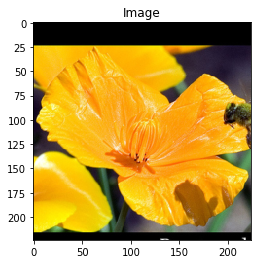

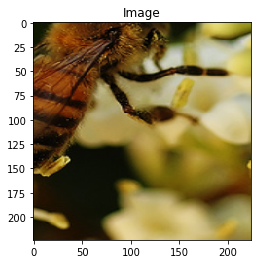

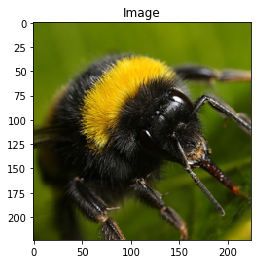

In [7]:
unloader = transforms.ToPILImage()  # reconvert into PIL image
#transforms：torchvision的子模块，常用的图像操作
#.ToPILImage() 把tensor或数组转换成图像
#详细转换过程可以看这个：https://blog.csdn.net/qq_37385726/article/details/81811466

plt.ion() #交互模式，默认是交互模式，可以不写
#详细了解看这个：https://blog.csdn.net/SZuoDao/article/details/52973621
#plt.ioff()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension 
    #这个.squeeze(0)看不懂，去掉也可以运行
    
    image = unloader(image) #tensor转换成图像
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(1) # pause a bit so that plots are updated
    #可以去掉看看，只是延迟显示作用


plt.figure()
imshow(img[8], title='Image') 
imshow(img[9], title='Image')
imshow(img[10], title='Image')

### 把训练集和验证集分batch转换成迭代器

现在我们知道了模型输入的size，我们就可以把数据预处理成相应的格式。

In [8]:
data_transforms = {
    "train": transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}
#把迭代器存放到字典里作为value，key是train和val，后面调用key即可。

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [9]:
inputs, labels=next(iter(dataloaders_dict["train"])) #一个batch
print(inputs.shape)
print(labels)

torch.Size([32, 3, 224, 224])
tensor([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0])


In [10]:
for inputs, labels in dataloaders_dict["train"]:
    #print(inputs)
    #print(labels)
    print(labels.size()) #最后一个batch不足32

torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([20])


### 加载resnet模型并修改全连接层

In [11]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"
# Number of classes in the dataset
num_classes = 2
# Number of epochs to train for 
num_epochs = 2
# Flag for feature extracting. When False, we finetune the whole model, 
#   when True we only update the reshaped layer params
feature_extract = True  #只更新修改的层

In [12]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:                # 如果采用第二种transfer learning
        for param in model.parameters():  # 更新每个参数的梯度
            param.requires_grad = False   # 提取的参数梯度不更新

In [15]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    if model_name == "resnet":
        model_ft = models.resnet18(pretrained=use_pretrained) # 如果True，从imagenet上返回预训练的模型和参数
        
        
        set_parameter_requires_grad(model_ft, feature_extract)# 提取的参数梯度不更新
        
        #print(model_ft) 可以打印看下
        
        # 获取最后一个全连接层的输入特征维度
        num_ftrs = model_ft.fc.in_features 
        # model_ft.fc是resnet的最后全连接层
        # (fc): Linear(in_features=512, out_features=1000, bias=True)
        # in_features 是全连接层的输入特征维度
        #print(num_ftrs)
        
        # 构建新的全连接层, 输出特征就是分类问题的类别数
        model_ft.fc = nn.Linear(num_ftrs, num_classes)  # out_features=1000 改为 num_classes=2
        
        input_size = 224 #resnet18网络输入图片维度是224，resnet34，50，101，152也是
        
    return model_ft, input_size

model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### 查看需要更新的参数、定义优化器

In [16]:
next(iter(model_ft.named_parameters()))

('conv1.weight', Parameter containing:
 tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
             1.7083e-02, -1.2694e-02],
           [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
            -1.2907e-01,  3.7424e-03],
           [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
             2.5632e-01,  6.3573e-02],
           ...,
           [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
            -4.2058e-01, -2.5781e-01],
           [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
             3.9359e-01,  1.6606e-01],
           [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
            -8.2230e-02, -5.7828e-03]],
 
          [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
             6.6221e-04, -2.5743e-02],
           [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
            -1.6051e-01, -1.2826e-03],
           [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,


In [17]:
len(next(iter(model_ft.named_parameters()))) #是元组，只有两个值

2

In [18]:
for name,param in model_ft.named_parameters():
    print(name) #看下都有哪些参数

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

In [19]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters() #需要更新的参数
print("Params to learn:")
if feature_extract:
    params_to_update = [] #需要更新的参数存放在此
    for name,param in model_ft.named_parameters(): 
        #model_ft.named_parameters()有啥看上面cell
        if param.requires_grad == True: 
#这里要知道全连接层之前的层param.requires_grad == Flase
#后面加的全连接层param.requires_grad == True
            params_to_update.append(param)
            print("\t",name)
else: #否则，所有的参数都会更新
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9) #定义优化器
# Setup the loss fxn
criterion = nn.CrossEntropyLoss() #定义损失函数

Params to learn:
	 fc.weight
	 fc.bias


### 定义训练模型

In [20]:
#训练测试合一起了
def train_model(model, dataloaders, criterion, optimizer, num_epochs=5):
    since = time.time()
    val_acc_history = [] 
    best_model_wts = copy.deepcopy(model.state_dict())#深拷贝上面resnet模型参数
#.copy和.deepcopy区别看这个：https://blog.csdn.net/u011630575/article/details/78604226 
    best_acc = 0.
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs-1))
        print("-"*10)
        
        for phase in ["train", "val"]:
            running_loss = 0.
            running_corrects = 0.
            if phase == "train":
                model.train()
            else: 
                model.eval()
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                with torch.autograd.set_grad_enabled(phase=="train"):
                    #torch.autograd.set_grad_enabled梯度管理器，可设置为打开或关闭
                    #phase=="train"是True和False，双等号要注意
                    outputs = model(inputs)    # batch size * 2
                    loss = criterion(outputs, labels)
                    
                _, preds = torch.max(outputs, 1)
                #返回每一行最大的数和索引，preds的位置是索引的位置
                #也可以preds = outputs.argmax(dim=1)
                if phase == "train":
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                running_loss += loss.item() * inputs.size(0) #交叉熵损失函数是平均过的
                running_corrects += torch.sum(preds.view(-1) == labels.view(-1)).item()
                #.view(-1)展开到一维，并自己计算
            
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)
       
            print("{} Loss: {} Acc: {}".format(phase, epoch_loss, epoch_acc))
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                #模型变好，就拷贝更新后的模型参数
                
            if phase == "val":
                val_acc_history.append(epoch_acc) #记录每个epoch验证集的准确率
            
        print()
    
    time_elapsed = time.time() - since
    print("Training compete in {}m {}s".format(time_elapsed // 60, time_elapsed % 60))
    print("Best val Acc: {}".format(best_acc))
    
    model.load_state_dict(best_model_wts) #把最新的参数复制到model中
    return model, val_acc_history

### 运行模型

In [21]:
# Train and evaluate
model_ft, ohist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/1
----------
train Loss: 0.6921768686810478 Acc: 0.5368852459016393
val Loss: 0.5892930174964706 Acc: 0.7058823529411765

Epoch 1/1
----------
train Loss: 0.5258376324763063 Acc: 0.7868852459016393
val Loss: 0.4044885068547492 Acc: 0.8758169934640523

Training compete in 0.0m 53.948896408081055s
Best val Acc: 0.8758169934640523


In [22]:
ohist

[0.7058823529411765, 0.8758169934640523]

In [23]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
save_model = True
if (save_model):
    torch.save(model_ft.state_dict(),"hymenoptera_feature_extraction.pt")   #词典格式，model.state_dict()只保存模型参数

In [26]:
# Initialize the non-pretrained version of the model used for this run
scratch_model,_ = initialize_model(model_name, 
                                   num_classes, 
                                   feature_extract=False, #所有参数都训练
                                   use_pretrained=False)# 不要imagenet的参数
scratch_model = scratch_model.to(device)
scratch_optimizer = optim.SGD(scratch_model.parameters(), 
                              lr=0.001, momentum=0.9)
scratch_criterion = nn.CrossEntropyLoss()
_,scratch_hist = train_model(scratch_model, 
                             dataloaders_dict, 
                             scratch_criterion, 
                             scratch_optimizer, 
                             num_epochs=num_epochs)

Epoch 0/1
----------


RuntimeError: CUDA out of memory. Tried to allocate 98.00 MiB (GPU 0; 1024.00 MiB total capacity; 450.59 MiB already allocated; 2.36 MiB free; 472.00 MiB reserved in total by PyTorch)

In [ ]:
save_model = True
if (save_model):
    torch.save(scratch_model.state_dict(),"hymenoptera_fine_tuning.pt")   #词典格式，model.state_dict()只保存模型参数

In [ ]:
# Plot the training curves of validation accuracy vs. number 
#  of training epochs for the transfer learning method and
#  the model trained from scratch
# ohist = []
# shist = []

# ohist = [h.cpu().numpy() for h in ohist]
# shist = [h.cpu().numpy() for h in scratch_hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Pretrained")
plt.plot(range(1,num_epochs+1),scratch_hist,label="Scratch")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()

## RNN模型: LSTM和GRU

循环神经网络的基本结构特别简单，就是将网络的输出保存在一个记忆单元中，这个记忆单元和下一次的输入一起进入神经网络中。   

有的时候序列的信息不只是单边有用，双边的信息对预测结果也很重要，比如语音信号，这时候就需要看到两侧信息的循环神经网络结构 士 这并不需要用两个循环神经网络分别从左右两边开始读取序列输入，使用二个双向的循环神经网络就能完成这个任务。   
使用双向循环神经网络，网络会无从序列的正方向读取数据啕再从反方向读取数据，最后将网络输出的两种结果合在一起形成网络的最终输出结果。   

**存在的问题：**  
- 循环神经网络能够很好地解决这种短时依赖的问题
- 但是对于长时依赖的问题，循环神经网络的表现就不再那么尽如人意



### 一般的 RNN

对于最简单的 RNN，我们可以使用下面两种方式去调用，分别是 torch.nn.RNNCell() 和 torch.nn.RNN()，这两种方式的区别在于 RNNCell() 只能接受序列中单步的输入，且必须传入隐藏状态，而 RNN() 可以接受一个序列的输入，默认会传入全 0 的隐藏状态，也可以自己申明隐藏状态传入。

RNN() 里面的参数有

- input_size 表示输入 $x_t$ 的特征维度
- hidden_size 表示输出 $h_t$ 的特征维度
- num_layers 表示网络的层数, 默认是1层
- nonlinearity 表示选用的非线性激活函数，默认是 'tanh',可以选择'relu'
- bias 表示是否使用偏置，默认是True
- batch_first 表示输入数据的形式，默认是 False，就是这样形式，(seq, batch, feature)，也就是将序列长度放在第一位，batch 放在第二位
- dropout 表示是否在输出层应用 dropout, 接受一个 0~1 的数值, 会在网络中除了最后一层之外的其他输出层加上 dropout 层
- bidirectional 表示是否使用双向的 rnn，默认是 False

对于 RNNCell()，里面的参数就少很多，只有 input_size，hidden_size，bias 以及 nonlinearity

In [1]:
import torch
from torch.autograd import Variable
from torch import nn

In [2]:
# 定义一个单步的 rnn
rnn_single = nn.RNNCell(input_size=100, hidden_size=200)

In [3]:
# 访问其中的参数
rnn_single.weight_hh

Parameter containing:
tensor([[ 0.0252, -0.0069, -0.0409,  ...,  0.0282, -0.0390, -0.0321],
        [ 0.0342,  0.0309, -0.0699,  ..., -0.0330,  0.0579,  0.0169],
        [-0.0554, -0.0054,  0.0296,  ..., -0.0688, -0.0479,  0.0202],
        ...,
        [-0.0023, -0.0406, -0.0580,  ...,  0.0532,  0.0678, -0.0347],
        [-0.0386, -0.0474,  0.0036,  ..., -0.0468, -0.0672, -0.0585],
        [-0.0701,  0.0131, -0.0014,  ..., -0.0628,  0.0507,  0.0608]],
       requires_grad=True)

In [4]:
# 构造一个序列，长为 6，batch 是 5， 特征是 100
# (seq, batch, feature), 分别表示序列长度、批量相输入的特征维度
x = Variable(torch.randn(6, 5, 100)) # 这是 rnn 的输入格式 

In [5]:
# 定义初始的记忆状态
# 隐藏状态,它的维度是 (lαyers *direction, batch, hidden),分别表示层数乘方向(如果是单向，就是1, 如果是双向就是2)、批量和输出的维度 
h_t = Variable(torch.zeros(5, 200)) # 这是1层, 单向的记忆输入

In [6]:
# 传入 rnn
# 网络会输出 out 和 h_t, 
# out 表示网络实际的输出, 维度是 (seq, batch , hidden *direction),分别表示序列长度、批量和输 出维度乘上方向
# h_t 表示记忆单元, 维度是 (lαyer *dírection, batch , hidden), 分别表示层数乘方向、批量和输出维度
out = []
for i in range(6):                 # 通过循环 6 次作用在整个序列上
    h_t = rnn_single(x[i], h_t)    # 记忆单元
    out.append(h_t)                # 网络实际输出

In [7]:
h_t

tensor([[-0.3518, -0.0364,  0.1635, -0.0772,  0.2308, -0.0488, -0.1175, -0.5568,
          0.7001, -0.5971,  0.3310, -0.3515, -0.0477, -0.2970,  0.5956, -0.6325,
          0.1408, -0.2101, -0.5751,  0.2184, -0.2284, -0.2366, -0.4287, -0.2953,
         -0.0555, -0.1566,  0.5987, -0.0785,  0.4350, -0.0046, -0.0968,  0.2141,
         -0.1590,  0.2390,  0.4549,  0.4925, -0.3056,  0.4298, -0.3021, -0.4108,
          0.4418, -0.0517, -0.0479,  0.6329,  0.2691, -0.1983, -0.4517, -0.5117,
         -0.3168, -0.5002, -0.8039,  0.2458,  0.3355, -0.2915,  0.0542,  0.4077,
         -0.2303,  0.0567, -0.1633,  0.1110,  0.0326, -0.8627, -0.0349, -0.5690,
         -0.2441,  0.5836, -0.7004,  0.1153, -0.3388, -0.2186,  0.4447,  0.2134,
          0.0362, -0.6038,  0.2016, -0.0982, -0.4740, -0.4473,  0.4698, -0.5312,
         -0.1576, -0.4834,  0.4571,  0.8467,  0.2635, -0.4409, -0.3873,  0.1847,
          0.0570, -0.7175, -0.2737,  0.6398, -0.2830, -0.2994,  0.0524,  0.0342,
         -0.3577, -0.2563, -

In [8]:
len(out)

6

In [9]:
out[0].shape          # 每个网络输出的维度 == hidden

torch.Size([5, 200])

可以看到经过了 rnn 之后，隐藏状态的值已经被改变了，因为网络记忆了序列中的信息，同时输出 6 个结果

下面我们看看直接使用 RNN 的情况

In [10]:
# 建立一个简单的RNN, 输入维度是100, 输出维度是200, 单层的单向网络
rnn_seq = nn.RNN(input_size=100, hidden_size=200)

In [11]:
# 访问其中的参数
rnn_seq.weight_hh_l0

Parameter containing:
tensor([[ 0.0046, -0.0679,  0.0339,  ..., -0.0620,  0.0640, -0.0071],
        [-0.0449, -0.0328, -0.0298,  ...,  0.0608, -0.0134,  0.0382],
        [-0.0266,  0.0419,  0.0591,  ..., -0.0624, -0.0240,  0.0247],
        ...,
        [ 0.0324, -0.0289, -0.0168,  ..., -0.0142, -0.0192,  0.0197],
        [-0.0255,  0.0637,  0.0675,  ...,  0.0073, -0.0291,  0.0549],
        [-0.0117, -0.0101, -0.0160,  ..., -0.0259, -0.0454, -0.0240]],
       requires_grad=True)

In [12]:
out, h_t = rnn_seq(x) # 使用默认的全 0 隐藏状态

In [13]:
h_t

tensor([[[ 3.4743e-01, -4.1833e-01, -1.3002e-01, -1.4949e-01, -2.0853e-01,
           2.5762e-01, -2.7606e-02, -7.0062e-01,  8.8976e-02,  4.7324e-01,
           2.0422e-01, -1.8284e-01,  5.0904e-01,  5.1196e-01,  4.0852e-02,
           3.1532e-01,  1.7475e-01,  2.4791e-01, -5.1578e-01, -2.4453e-01,
           4.5467e-01, -6.7350e-01,  2.9835e-01,  2.0112e-01, -6.3141e-02,
           4.6543e-01, -5.6270e-02, -8.4642e-02, -6.1356e-01,  1.6327e-01,
          -6.8092e-01, -2.8065e-01,  5.6781e-02, -7.3502e-01, -4.1415e-01,
          -1.9187e-01, -3.0245e-01, -7.0087e-01,  5.5453e-01, -8.0245e-01,
          -5.8876e-02, -1.0354e-01, -3.9729e-01, -4.1101e-01,  5.6191e-01,
          -5.8613e-01,  2.0793e-01, -2.0701e-01, -5.9400e-01, -7.2820e-02,
           5.8388e-01,  1.5842e-02,  6.4903e-01,  6.2272e-01, -5.8538e-01,
           3.8173e-02, -1.7829e-01,  3.7424e-01,  3.5606e-02, -3.7641e-01,
          -4.1123e-01, -7.2727e-01,  4.5837e-01,  5.8107e-02, -2.3949e-01,
           3.1737e-01, -7

In [14]:
len(out)

6

这里的 h_t 是网络最后的隐藏状态，网络也输出了 6 个结果

In [15]:
# 自己定义初始的隐藏状态
h_0 = Variable(torch.randn(1, 5, 200))

这里的隐藏状态的大小有三个维度，分别是 (num_layers * num_direction, batch, hidden_size)

In [16]:
out, h_t = rnn_seq(x, h_0)

In [17]:
h_t

tensor([[[ 0.3602, -0.4510, -0.1078, -0.1639, -0.1794,  0.2302, -0.0450,
          -0.7032,  0.0777,  0.4752,  0.1848, -0.1590,  0.5054,  0.4968,
           0.0449,  0.2927,  0.1980,  0.2552, -0.5238, -0.2238,  0.4562,
          -0.6857,  0.3160,  0.1582, -0.0489,  0.4430, -0.0667, -0.1046,
          -0.6270,  0.1601, -0.6957, -0.2830,  0.0689, -0.7378, -0.3894,
          -0.2075, -0.2755, -0.7064,  0.5382, -0.7970, -0.0320, -0.1017,
          -0.4165, -0.3964,  0.5376, -0.5916,  0.2195, -0.2091, -0.6049,
          -0.0873,  0.6037,  0.0326,  0.6466,  0.6305, -0.5619,  0.0608,
          -0.1613,  0.3919,  0.0423, -0.3728, -0.4074, -0.7086,  0.4597,
           0.0284, -0.2437,  0.3113, -0.7050,  0.0914, -0.9514,  0.0065,
          -0.3834, -0.1529, -0.4295, -0.7598, -0.4686, -0.6123, -0.1017,
          -0.2045, -0.0357, -0.4004, -0.0095, -0.0669, -0.0998, -0.5932,
          -0.4056,  0.4499, -0.1651, -0.1041, -0.4473,  0.4276, -0.0119,
          -0.3543, -0.0381,  0.0419, -0.7354, -0.57

In [18]:
out.shape

torch.Size([6, 5, 200])

同时输出的结果也是 (seq, batch, feature)

一般情况下我们都是用 nn.RNN() 而不是 nn.RNNCell()，因为 nn.RNN() 能够避免我们手动写循环，非常方便，同时如果不特别说明，我们也会选择使用默认的全 0 初始化隐藏状态

### LSTM
LSTM 和基本的 RNN 是一样的，他的参数也是相同的，同时他也有 nn.LSTMCell() 和 nn.LSTM() 两种形式，跟前面讲的都是相同的，我们就不再赘述了，下面直接举个小例子  

In [19]:
# 定义一个和标准 RNN 输入输出柑同的 LSTM
lstm_seq = nn.LSTM(50, 100, num_layers=2) # 输入维度 100，输出 200，两层

In [20]:
# 第一层的 h_t 权重
lstm_seq.weight_hh_l0 

Parameter containing:
tensor([[ 0.0369, -0.0880, -0.0751,  ..., -0.0187,  0.0252,  0.0536],
        [-0.0171, -0.0023,  0.0566,  ...,  0.0993,  0.0980,  0.0803],
        [ 0.0338,  0.0203, -0.0544,  ..., -0.0801, -0.0134,  0.0592],
        ...,
        [-0.0523,  0.0383,  0.0996,  ...,  0.0192,  0.0081,  0.0977],
        [ 0.0371, -0.0908,  0.0604,  ..., -0.0160,  0.0492,  0.0417],
        [-0.0687,  0.0491,  0.0036,  ..., -0.0493, -0.0960,  0.0882]],
       requires_grad=True)

In [21]:
# 输入序列
lstm_input = Variable(torch.randn(10, 3, 50)) # 序列 10,batch 是 3,输入维度 50

In [22]:
# 输出: 网络输出, (记忆单元, 记忆)
out, (h, c) = lstm_seq(lstm_input) # 使用默认的全 0 隐藏状态

注意这里 LSTM 输出的隐藏状态有两个，h 和 c，就是上图中的每个 cell 之间的两个箭头，这两个隐藏状态的大小都是相同的，(num_layers * direction, batch, feature)

In [23]:
h.shape # 两层, Batch 是 3, 特征是 100

torch.Size([2, 3, 100])

In [24]:
c.shape

torch.Size([2, 3, 100])

In [25]:
out.shape

torch.Size([10, 3, 100])

我们可以不使用默认的隐藏状态，这是需要传入两个张量

In [26]:
h_init = Variable(torch.randn(2, 3, 100))
c_init = Variable(torch.randn(2, 3, 100))

In [27]:
out, (h, c) = lstm_seq(lstm_input, (h_init, c_init))

In [28]:
h.shape

torch.Size([2, 3, 100])

In [29]:
c.shape

torch.Size([2, 3, 100])

In [30]:
out.shape

torch.Size([10, 3, 100])

### GRU

GRU 和前面讲的这两个是同样的道理，就不再细说，还是演示一下例子

In [31]:
# 创建输入维度是10, 输出维度是20的GRU模型
gru_seq = nn.GRU(10, 20)

# 输入序列 (序列长度, batch size,输入维度)
gru_input = Variable(torch.randn(3, 32, 10))

# 输出序列: 网络输出, 记忆单元
out, h = gru_seq(gru_input)

In [32]:
# 单层的权重值
gru_seq.weight_hh_l0

Parameter containing:
tensor([[ 0.1367,  0.1975,  0.0129,  ...,  0.0552,  0.0709,  0.0296],
        [-0.1643, -0.1433, -0.1046,  ..., -0.0564,  0.0175, -0.0587],
        [ 0.1233, -0.0526,  0.0625,  ..., -0.2181,  0.1743, -0.0450],
        ...,
        [ 0.1914, -0.2157,  0.0238,  ...,  0.1018,  0.1273,  0.0737],
        [ 0.1444, -0.0461,  0.0061,  ..., -0.1408, -0.0675,  0.2065],
        [-0.1073, -0.1014,  0.0034,  ...,  0.1835,  0.0182,  0.0415]],
       requires_grad=True)

In [33]:
# 记忆单元的维度 (lαyer *dírection, batch, hidden)
h.shape

torch.Size([1, 32, 20])

In [34]:
# 网络输出的维度 (seq, batch, hidden *direction)
out.shape

torch.Size([3, 32, 20])

## RNN 做图像分类

前面我们讲了 RNN 特别适合做序列类型的数据, 那么 RNN 能不能想 CNN 一样用来做图像分类呢? 下面我们用 mnist 手写字体的例子来展示一下如何用 RNN 做图像分类, 但是这种方法并不是主流, 这里我们只是作为举例。

对于一张手写字体的图片, 其大小是 28 * 28, 我们可以将其看做是一个长为 28 的序列，每个序列的特征都是 28, 这样就将图片变成了一个序列。 同时考虑到循环神经网络的记忆性, 所以图片从左往右输入网络的时候, 网络可以记忆住前面观察到的东西，也就是说一张图片虽然被切割成了 28 份, 但是网络能够通过记住前面的部分, 同时和后面的部分结合得到最后预测数字的输出结果, 所以从理论上而言是行得通的。

这样我们解决了输入序列的问题，对于输出序列怎么办呢？其实非常简单，虽然我们的输出是一个序列，但是我们只需要保留其中一个作为输出结果就可以了，这样的话肯定保留最后一个结果是最好的，因为最后一个结果有前面所有序列的信息，就像下面这样

In [46]:
import sys
sys.path.append('..')

import torch
from torch.autograd import Variable
from torch import nn
from torch.utils.data import DataLoader

from torchvision import transforms as tfs
from torchvision.datasets import MNIST
from datetime import datetime
import torch.nn.functional as F

In [37]:
# 定义数据
data_tf = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize([0.5], [0.5]) # 标准化
])

train_set = MNIST('./mnist_data', train=True, transform=data_tf)
test_set = MNIST('./mnist_data', train=False, transform=data_tf)

train_data = DataLoader(train_set, 64, True, num_workers=4)
test_data = DataLoader(test_set, 128, False, num_workers=4)

In [38]:
# 定义模型: LSTM + Linear
class rnn_classify(nn.Module):
    def __init__(self, in_feature=28, hidden_feature=100, num_class=10, num_layers=2):
        super(rnn_classify, self).__init__()
        self.rnn = nn.LSTM(in_feature, hidden_feature, num_layers) # 使用两层 lstm
        self.classifier = nn.Linear(hidden_feature, num_class) # 将最后一个 rnn 的输出使用全连接得到最后的分类结果
        
    def forward(self, x):
        '''
        x 大小为 (batch, 1, 28, 28)，所以我们需要将其转换成 RNN 的输入形式，即 (28, batch, 28)
        '''
        x = x.squeeze()         # 去掉 (batch, 1, 28, 28) 中的 1，变成 (batch, 28, 28)
        x = x.permute(2, 0, 1)  # 将最后一维放到第一维，变成 (28, batch, 28)
        out, _ = self.rnn(x)    # 使用默认的隐藏状态，得到的 out 是 (28, batch, hidden_feature)
        out = out[-1, :, :]     # 取序列中的最后一个，大小是 (batch, hidden_feature)
        out = self.classifier(out) # 得到分类结果
        return out

In [72]:
def get_acc(output, label):
    total = output.shape[0]
    _, pred_label = output.max(1)
#     num_correct = (pred_label == label).sum().data[0]
    num_correct = (pred_label == label).sum().item()
    return num_correct / total

def train(net, train_data, valid_data, num_epochs, optimizer, criterion):
    if torch.cuda.is_available():
        net = net.cuda()
    prev_time = datetime.now()
    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        net = net.train()
        for im, label in train_data:
            if torch.cuda.is_available():
                im = Variable(im.cuda())  # (bs, 3, h, w)
                label = Variable(label.cuda())  # (bs, h, w)
            else:
                im = Variable(im)
                label = Variable(label)
            # forward
            output = net(im)
            loss = criterion(output, label)
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

#             train_loss += loss.data[0]
            train_loss += loss.item()
            train_acc += get_acc(output, label)

        cur_time = datetime.now()
        h, remainder = divmod((cur_time - prev_time).seconds, 3600)
        m, s = divmod(remainder, 60)
        time_str = "Time %02d:%02d:%02d" % (h, m, s)
        if valid_data is not None:
            valid_loss = 0
            valid_acc = 0
            net = net.eval()
            for im, label in valid_data:
                if torch.cuda.is_available():
                    im = Variable(im.cuda(), volatile=True)
                    label = Variable(label.cuda(), volatile=True)
                else:
                    im = Variable(im, volatile=True)
                    label = Variable(label, volatile=True)
                output = net(im)
                loss = criterion(output, label)
#                 valid_loss += loss.data[0]
                valid_loss += loss.item()
                valid_acc += get_acc(output, label)
            epoch_str = (
                "Epoch %d. Train Loss: %f, Train Acc: %f, Valid Loss: %f, Valid Acc: %f, "
                % (epoch, train_loss / len(train_data),
                   train_acc / len(train_data), valid_loss / len(valid_data),
                   valid_acc / len(valid_data)))
        else:
            epoch_str = ("Epoch %d. Train Loss: %f, Train Acc: %f, " %
                         (epoch, train_loss / len(train_data),
                          train_acc / len(train_data)))
        prev_time = cur_time
        print(epoch_str + time_str)

In [73]:
net = rnn_classify()
criterion = nn.CrossEntropyLoss()

optimzier = torch.optim.Adadelta(net.parameters(), 1e-1)

In [74]:
# 开始训练
train(net, train_data, test_data, 10, optimzier, criterion)

C:\Users\z5039792\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
C:\Users\z5039792\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch 0. Train Loss: 1.896347, Train Acc: 0.283465, Valid Loss: 1.057967, Valid Acc: 0.643987, Time 00:00:23
Epoch 1. Train Loss: 0.610419, Train Acc: 0.812783, Valid Loss: 0.376018, Valid Acc: 0.888746, Time 00:00:29
Epoch 2. Train Loss: 0.255505, Train Acc: 0.925756, Valid Loss: 0.190454, Valid Acc: 0.942939, Time 00:00:28
Epoch 3. Train Loss: 0.169123, Train Acc: 0.950210, Valid Loss: 0.178713, Valid Acc: 0.946895, Time 00:00:29
Epoch 4. Train Loss: 0.131067, Train Acc: 0.960671, Valid Loss: 0.112382, Valid Acc: 0.968453, Time 00:00:27
Epoch 5. Train Loss: 0.107432, Train Acc: 0.967034, Valid Loss: 0.095230, Valid Acc: 0.971321, Time 00:00:27
Epoch 6. Train Loss: 0.092294, Train Acc: 0.972531, Valid Loss: 0.085311, Valid Acc: 0.975376, Time 00:00:28
Epoch 7. Train Loss: 0.080391, Train Acc: 0.975696, Valid Loss: 0.089510, Valid Acc: 0.974288, Time 00:00:36
Epoch 8. Train Loss: 0.070738, Train Acc: 0.978811, Valid Loss: 0.072275, Valid Acc: 0.979331, Time 00:00:32
Epoch 9. Train Loss

可以看到，训练 10 次在简单的 mnist 数据集上也取得的了 98% 的准确率，所以说 RNN 也可以做做简单的图像分类，但是这并不是他的主战场，下次课我们会讲到 RNN 的一个使用场景，时间序列预测。

## RNN 用于时间序列的分析  

前面我们讲到使用 RNN 做简单的图像分类的问题，但是 RNN 并不擅长此类问题，下面我们讲一讲如何将 RNN 用到时间序列的问题上，因为对于时序数据，后面的数据会用到前面的数据，LSTM 的记忆特性非常适合这种场景。

首先我们可以读入数据，这个数据是 10 年飞机月流量，可视化得到下面的效果。